# Dr. Maryam Khanian

# Date: 20.03.2019

### Why jupyter notebook:
As well as being a useful interactive interface to Python, a jupyter notebook also provides a
number of useful syntactic additions to the language. In addition, using this envoronment is about using Python effectively for interactive scientific and data-intensive computing. My favorite part of using this interface is the use of the *Tab key* for autocompletion and exploration of the contents of objects, modules, and namespaces.

## Imports
 
At this point we import some of the standard data science and machine learning libraries: `numpy`, `pandas`, and `scikit-learn`. We also use `matplotlib` and `seaborn` for visualization.

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Truncated floating point formatting
pd.options.display.float_format = '{:.2f}'.format

# turning off the warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)


# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 14

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 1.5)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

In [2]:
%%javascript
//Disabling iPython notebook Autoscrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Getting Familiar with the data

### Data manipulation with Pandas:

For the import and manipulation of the data, I use `pandas` package due to the following reason:

1.  Pandas has a well-designed data structure called *dataframe* with column names that can help a lot in keeping track of our data.  
2.  The provided training data is a kind of heterogeneous data including nummeric as well as categorial values. With a pandas dataframe, we are able to work with different data types (float, int, string, datetime, etc) all in one place.
3.  Pandas has some very useful built-in functionalities for a lot of common data-processing applications. For example, easy group by syntax, easy joins, etc.
4.  Pandas has a good IO capabilities.

### Data visualization with Seaborn:

For Data visualization, I use `seaborn` package of Python. Seaborn provides an API on top of traditional *Matplotlib* package that offers simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas DataFrames.

In [3]:
# Loading the provided training data from the csv file into a pandas dataframe (Data)
# Here, I used encoding = "ISO-8859-1" to prevent UnicodeDecodeError when importing csv file
# The file separator is ';'
Data = pd.read_csv('../input/dataanalyticschallenge8/TrainData.csv', encoding = "ISO-8859-1", sep = ";")
# take a look at the first five rows of the imported data
Data.head()

,Stammnummer,Zielvariable,Tag,Monat,Dauer,Anruf-ID,Alter,Geschlecht,Art der Anstellung,Familienstand,Schulabschluß,Ausfall Kredit,Kontostand,Haus,Kredit,Kontaktart,Anzahl der Ansprachen,Tage seit letzter Kampagne,Anzahl Kontakte letzte Kampagne,Ergebnis letzte Kampagne
0,432148809,nein,27,may,166,623,30,w,Arbeiter,verheiratet,Abitur,nein,-202,nein,nein,Unbekannt,2,nan,0,Unbekannt
1,432184318,nein,26,oct,183,1992,42,w,Management,verheiratet,Studium,nein,2463,nein,nein,Handy,2,nan,0,Unbekannt
2,432182482,nein,5,jun,227,2778,26,w,Dienstleistung,single,Abitur,nein,2158,ja,ja,Festnetz,1,nan,0,Unbekannt
3,432150520,nein,2,jun,31,3070,34,m,Arbeitslos,geschieden,Studium,ja,75,ja,nein,Unbekannt,3,nan,0,Unbekannt
4,432145870,nein,15,may,1231,6583,48,m,Arbeiter,verheiratet,Real-/Hauptschule,nein,559,ja,nein,Unbekannt,2,nan,0,Unbekannt


---

### Basic data description:
The provided training data contains of 20 features that can be classified in 2 main categories:
* **Customer Data (6 Features)**
    * Alter
    * Geschlecht
    * art der Anstellung
    * Familienstand
    * Schulabschluß
    * Haus
    
    
* **Operational Data (14 features)**
    * Stammnummer
    * Zielvariable
    * Tag
    * Monat
    * Dauer
    * Anruf-ID
    * Ausfall Kredit
    * Kontostand
    * Kredit
    * Kontaktart
    * Anzahl der Ansprachen
    * Tage seit letzter Kampagne
    * Anzahl Kontakte letzte Kampagne
    * Ergebnis letzte Kampagne

As the first step in our Exploratory Data Analysis (EDA) process, `dataframe.info()` method is a quick way to assess the data by displaying the data types of each column and the number of non-missing values.

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31480 entries, 0 to 31479
Data columns (total 20 columns):
Stammnummer                        31480 non-null int64
Zielvariable                       31480 non-null object
Tag                                31480 non-null int64
Monat                              31480 non-null object
Dauer                              31480 non-null int64
Anruf-ID                           31480 non-null int64
Alter                              31480 non-null int64
Geschlecht                         31480 non-null object
Art der Anstellung                 31480 non-null object
Familienstand                      31480 non-null object
Schulabschluß                      31480 non-null object
Ausfall Kredit                     31480 non-null object
Kontostand                         31480 non-null int64
Haus                               31480 non-null object
Kredit                             31480 non-null object
Kontaktart                         31480 n

As it can be seen, at the first glance, the only column that has possible missing values is the field of **'Tage seit letzter Kampagne'**.

In [5]:
# Next, we take a look to see how is the situation of missing data:
missing_data = pd.DataFrame({'total_missing': Data.isnull().sum(), 'perc_missing': (Data.isnull().sum()/len(Data))*100}).round(2)

# Print some summary information
print ("Our dataframe has " + str(Data.shape[1]) + " column(s).\n"
        "There is/are " + str(len(missing_data.loc[missing_data['total_missing'] > 0])) +
              " column(s) that has/have missing values.")
missing_data

Our dataframe has 20 column(s).
There is/are 1 column(s) that has/have missing values.


,total_missing,perc_missing
Stammnummer,0,0.00
Zielvariable,0,0.00
Tag,0,0.00
Monat,0,0.00
Dauer,0,0.00
Anruf-ID,0,0.00
Alter,0,0.00
Geschlecht,0,0.00
Art der Anstellung,0,0.00
Familienstand,0,0.00


For new customers, the value of **Tage seit letzter Kampagne** (Days from previous campaign) field is empty which seems reasonable, since we had no contact with those customers previously. We can replace these empty fields with a more meaningful numeric value such as **-1**:

In [6]:
Data['Tage seit letzter Kampagne'].fillna(-1, inplace=True)

Now, evrything seems perfect:

In [7]:
missing_data = pd.DataFrame({'total_missing': Data.isnull().sum(), 'perc_missing': (Data.isnull().sum()/len(Data))*100}).round(2)
missing_data

,total_missing,perc_missing
Stammnummer,0,0.00
Zielvariable,0,0.00
Tag,0,0.00
Monat,0,0.00
Dauer,0,0.00
Anruf-ID,0,0.00
Alter,0,0.00
Geschlecht,0,0.00
Art der Anstellung,0,0.00
Familienstand,0,0.00


---

## Exploratory Data Analysis (EDA):

Exploratory Data Analysis (EDA) is an open-ended process where we make plots and calculate statistics in order to explore our data. The purpose is to find anomalies, patterns, trends, or relationships. These may be interesting by themselves (for example finding a correlation between two variables) or they can be used to inform modeling decisions such as which features to use. In short, the goal of EDA is to determine what our data can tell us! EDA generally starts out with a high-level overview, and then narrows in to specific parts of the dataset once as we find interesting areas to examine. 


---

### Label balance check:

At this point, we need to check how is the distribution of our labels among the training data. It may have a big influence on the performance of our models as it will be discussed later. 

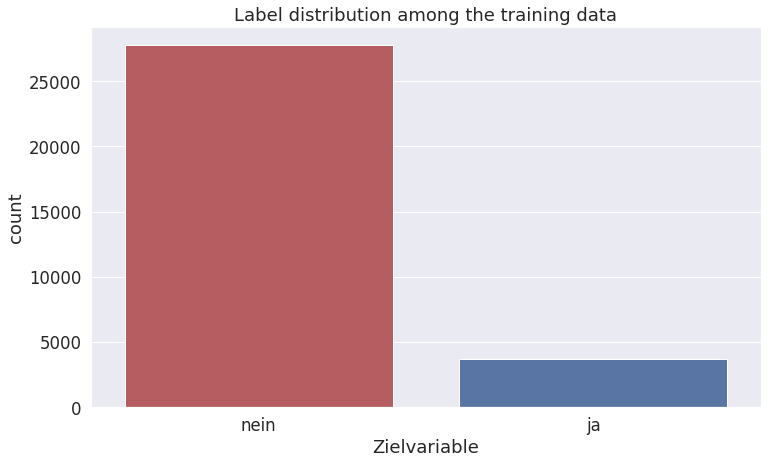

In [8]:
# Plotting the distribution of labels
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x='Zielvariable', data=Data, palette=['r', 'b'])
plt.title('Label distribution among the training data')
plt.show();

It seems that we have the **imbalanced data problem** meaning that there are many observations of **No Event** (calss 0) and only a few observations of **Yes Event** (class 1). So, we should consider this point in our models and approaches.

In [9]:
# Some textual information about labels' distribution
Yes = len(Data.loc[Data['Zielvariable'] == 'ja' , :])
No = len(Data.loc[Data['Zielvariable'] == 'nein' , :])

print('\nTotal number of samples: {}\n'.format(Yes+No) )
print('Number of campaign successes: {} ({:.2f}%)\n'.format(Yes, Yes*100/(Yes+No)))
print('Number of campaign failures: {} ({:.2f}%)\n'.format(No, No*100/(Yes+No)))


Total number of samples: 31480

Number of campaign successes: 3700 (11.75%)

Number of campaign failures: 27780 (88.25%)



Now, we can check the mean value of each feature w.r.t. our labels to see the difference between two groups of customers in each feature:

In [10]:
# Grouping the data based on the 'target value' into 'positive' and 'negative' customers
# and taking the maen value of nummerical features w.r.t. those groups
Data.groupby('Zielvariable').mean()

,Stammnummer,Tag,Dauer,Anruf-ID,Alter,Kontostand,Anzahl der Ansprachen,Tage seit letzter Kampagne,Anzahl Kontakte letzte Kampagne
Zielvariable,,,,,,,,,
ja,432175535.62,15.02,535.54,34222723.10,41.73,1807.03,2.13,68.99,1.16
nein,432163549.23,15.90,221.60,34703703.57,40.83,1287.47,2.87,36.42,0.51


So, we can see:

1. The call duration is more for positive customers.
2. The average age of the positive customers is slightly higher than negative ones.
2. The account balance of the positive customers is higher.
3. It is more likely to receive a negative answer when the time gap between the current and the previous campaign grows.
4. We called positive customers much more frequently in the last campaign.
5. We called negative customers more frequently in the current campaign.

We can do this for other features, for example by grouping on 'Familienstand' or 'Geschlecht' we are able to observe the difference between customers w.r.t. that specific feature:

In [11]:
# checking customers' properties w.r.t. their marital status
Data.groupby('Familienstand').mean()

,Stammnummer,Tag,Dauer,Anruf-ID,Alter,Kontostand,Anzahl der Ansprachen,Tage seit letzter Kampagne,Anzahl Kontakte letzte Kampagne
Familienstand,,,,,,,,,
geschieden,432164277.11,15.80,265.61,34924017.67,45.92,1180.75,2.66,41.16,0.54
single,432166731.67,15.67,265.25,34560872.71,33.76,1274.06,2.66,44.57,0.62
verheiratet,432164252.85,15.86,254.00,34635863.82,43.37,1414.91,2.86,38.04,0.57


It can be seen that our concentration in previous campaign was on married customers, while in current campaign we are more concentrated on single ones. It is worth mentioning that the **Kontostand** of married customers is higher than single or divorced ones. So, we have to check if this feature has a positive correlation with the target value or not.

In [12]:
# checking customers' properties w.r.t. their gender
Data.groupby('Geschlecht').mean()

,Stammnummer,Tag,Dauer,Anruf-ID,Alter,Kontostand,Anzahl der Ansprachen,Tage seit letzter Kampagne,Anzahl Kontakte letzte Kampagne
Geschlecht,,,,,,,,,
m,432164964.68,15.82,258.42,34772284.71,40.83,1332.35,2.78,40.13,0.56
w,432164951.40,15.78,258.58,34521580.57,41.04,1364.78,2.78,40.36,0.61


It seems that there is no meaningful difference between men and women in this campaign.

### Some other exploratory data visualization:

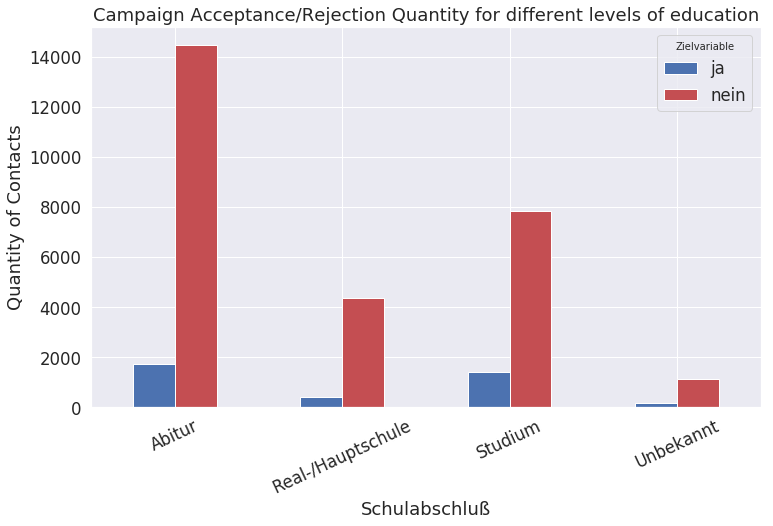

In [13]:
# Checking the campaign Acceptance/Rejection Quantity for different levels of education
pd.crosstab(Data['Schulabschluß'],Data.Zielvariable).plot(kind='bar', figsize=(12,7), color=['b', 'r'])
plt.title('Campaign Acceptance/Rejection Quantity for different levels of education')
plt.xlabel('Schulabschluß')
plt.ylabel('Quantity of Contacts')
plt.xticks(rotation='25');

As expected, number of contacts are not uniformly distributed w.r.t. levels of education. So, we can normalize our observations between 0 and 1 to make customers' Acceptance/Rejection rates more comparable for different levels of education:

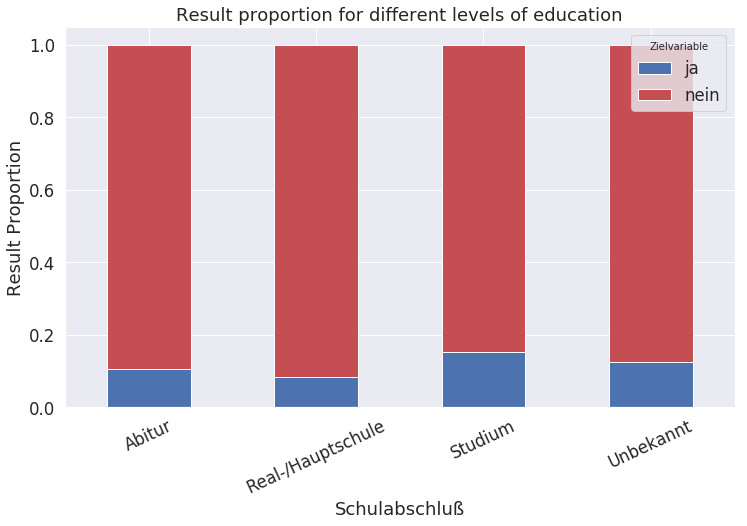

In [14]:
# Result proportion for different levels of education
result = pd.crosstab(Data['Schulabschluß'],Data.Zielvariable)
result.div(result.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(12,7), stacked=True, color=['b', 'r'])
plt.title('Result proportion for different levels of education')
plt.xlabel('Schulabschluß')
plt.ylabel('Result Proportion')
plt.xticks(rotation='25');

Now we can see the **_acceptance rate of the highly educated customers is higher_**. So we may conclude the level of education has an influence on the customers' feedback.

Next, we depict the influence of the time of the year on the campaign result:

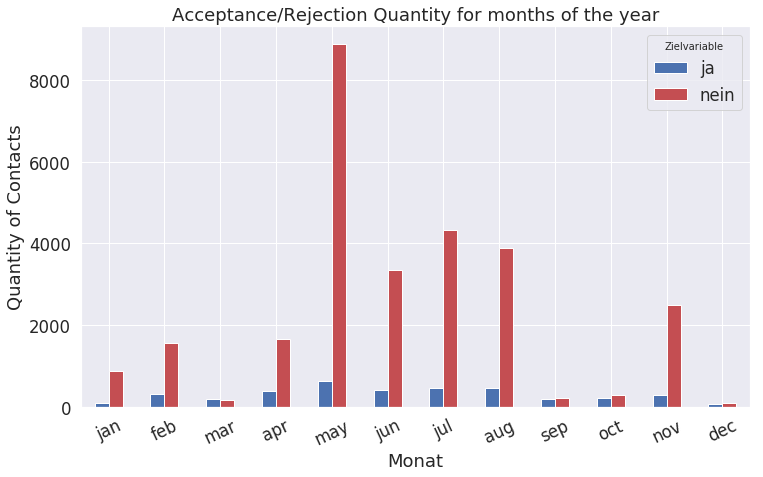

In [15]:
# Checking the campaign Acceptance/Rejection Quantity for months of the year
mah = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

temp= pd.crosstab(Data.Monat,Data.Zielvariable)
temp['idx'] = [4, 8, 12, 2, 1, 7, 6, 3, 5, 11, 10, 9]
temp.sort_values(by=['idx'], inplace=True)
temp.drop(['idx'], axis=1, inplace=True)
temp.plot(kind='bar', figsize=(12,7), color=['b', 'r'])
plt.title('Acceptance/Rejection Quantity for months of the year')
plt.xlabel('Monat')
plt.ylabel('Quantity of Contacts')
plt.xticks(rotation='25');

Looking at this bar chart, we can see the highest amount of contacts as well as successes are in _May_, while the lowest quantity of these two aspects is in _December_. Since, the contact distribution is not uniform along the year, again we should normalize the result for a fair comparison of the success rate in different months.

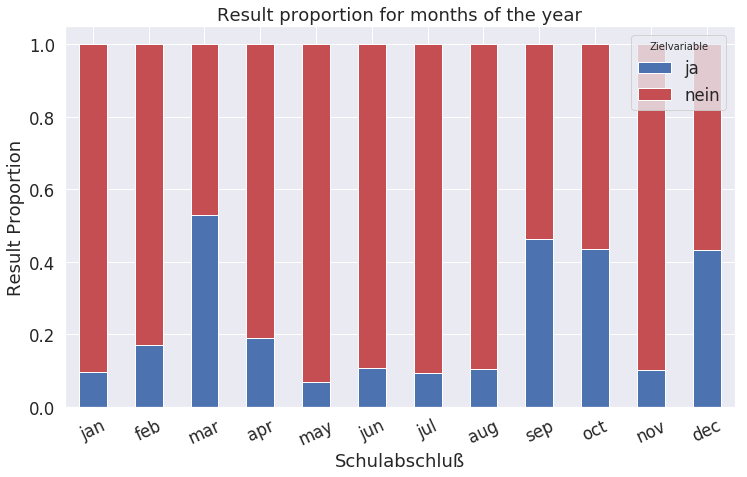

In [16]:
# Result proportion for months of the year
temp = pd.crosstab(Data['Monat'],Data.Zielvariable)
temp['idx'] = [4, 8, 12, 2, 1, 7, 6, 3, 5, 11, 10, 9]
temp.sort_values(by=['idx'], inplace=True)
temp.drop(['idx'], axis=1, inplace=True)
temp.div(temp.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(12,7), stacked=True, color=['b', 'r'])
plt.title('Result proportion for months of the year')
plt.xlabel('Schulabschluß')
plt.ylabel('Result Proportion')
plt.xticks(rotation='25');

Now, we have a completely different view on the success rate of months. Although _May_ has the highest number of contacts, the success rate of _May_ is the lowest one. On the other hand, for months in which we have the lowest number of contacts (e.g. _Mars, September, October and December_), the success rate is high.


Now, it is a good idea to see, how is the age distribution of the customers:

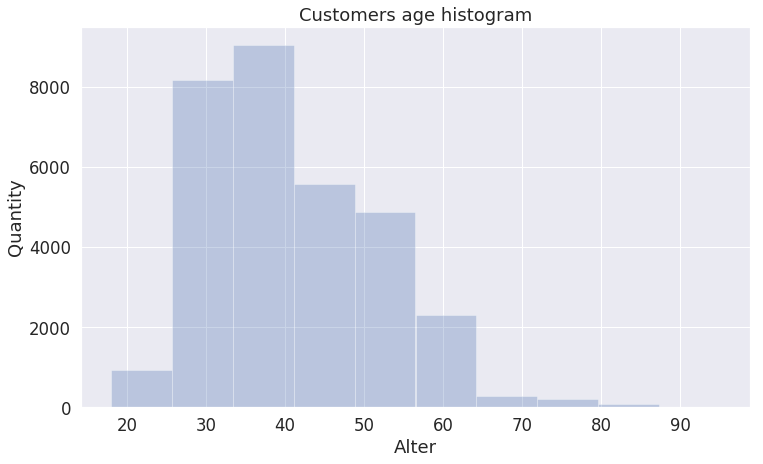

In [17]:
Data.Alter.hist(figsize=(12,7), alpha=0.3)
plt.title('Customers age histogram')
plt.xlabel('Alter')
plt.ylabel('Quantity');

As illustrated, the focus of the campaign is on the customers with the age of around 26-41.

## Adding the 'Day' attribute to the data:

In order to analyze the data in the shape of a time series, feature engineering is necessary to add a continuous time variable to the data. To this aim, two features of **Tag** and **Monat** are used to generate the new feature of **Day** which is the sequential number of the day in the year. For example, for August 13th, we should add the number of the days in all the previous months (212) to the date: 212+13 = 225. 

Doing so, we can use the **Day** feature to illustrate the campaign trend along the year:

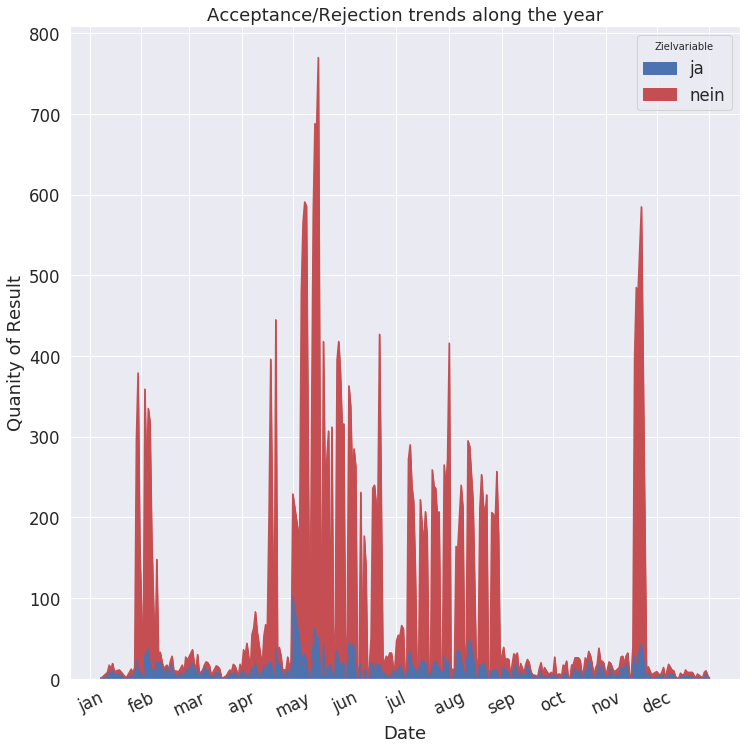

In [18]:
# Acceptance/Rejection trends along the year

Data['Day'] = Data['Tag']

months = ['feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
days   = [31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]

for m, d in zip(months, days):
    Data['Day'] = np.where(Data['Monat'] == m, Data['Tag'] +  d, Data['Day'] )
    
pd.crosstab(Data.Day, Data.Zielvariable).plot(kind='area', figsize=(12,12), color=['b', 'r'])
plt.title('Acceptance/Rejection trends along the year')
plt.xlabel('Date')

x_tick_location = [1] + days + [365] 
x_tick_labels = [mon for mon in months]
x_tick_labels = ['jan'] + x_tick_labels + ['']

plt.xticks(x_tick_location,x_tick_labels,rotation = '25')
plt.ylabel('Quanity of Result');

As it can be seen, our time series does not have an obvious trend, while a weekly seasonality is visible in the form of the campaign stops on weekends that is more observable between weeks with the high number of contacts (e.g. August weeks).

In addition, the campaign concentration is on February, May, June (except the last week), July (except the first week), August and the 'Black Friday' week in November. For a better visualization of these insights, I divided the year into 4 quarters and showed the result for each quarter separately.

### Campaign Cumulative Flow Diagram(CFD)

In this part, the Cumulative Flow Diagram (CFD) of the both positive and negative feedbacks is used as a valuable tool for tracking the performance of the campaign: 

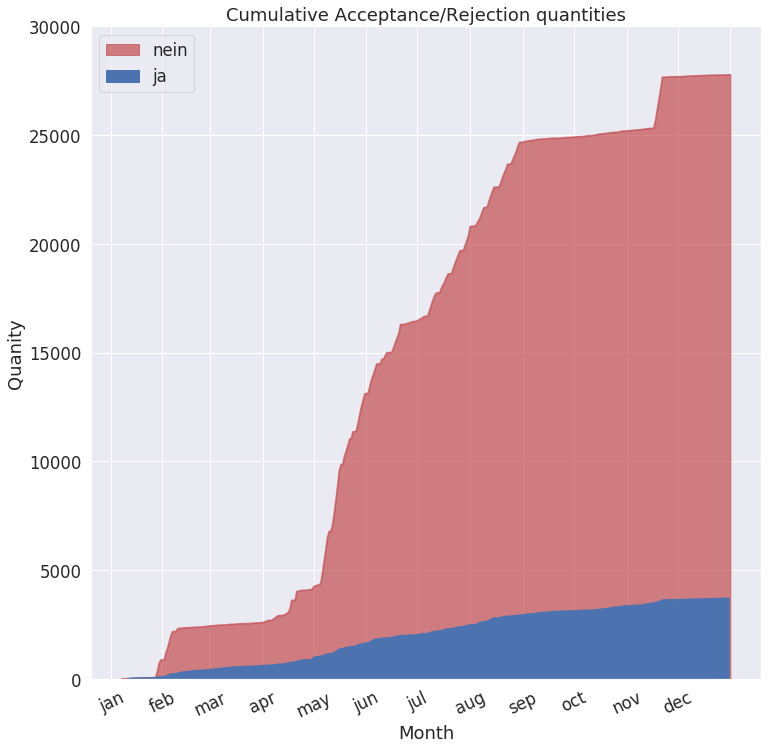

In [19]:
# cumulative results of the campaign along the year

temp1 = Data.loc[Data['Zielvariable'] == 'ja'][['Day', 'Zielvariable']]
temp1 = temp1.groupby('Day').count()
temp1['ja'] = temp1['Zielvariable'].cumsum()

temp2 = Data.loc[Data['Zielvariable'] == 'nein'][['Day', 'Zielvariable']]
temp2 = temp2.groupby('Day').count()
temp2['nein'] = temp2['Zielvariable'].cumsum()

ax = temp2.plot(kind = 'area', y='nein', use_index=True, figsize=(12,12), color = 'r', alpha=0.7)
temp1.plot(kind = 'area', y='ja', ax=ax, color='b')

plt.title('Cumulative Acceptance/Rejection quantities')
plt.xlabel('Month')
plt.ylabel('Quantity of Result')

x_tick_location = [1] + days + [365] 
x_tick_labels = [mon for mon in months]
x_tick_labels = ['jan'] + x_tick_labels + ['']

plt.ylim(0,30000)
plt.xticks(x_tick_location,x_tick_labels,rotation = '25')
plt.ylabel('Quanity');

### please refer to the 'img1.png' image for these comments
Now, we can see the cumulative illustration of the campaign results along the year showing how fast the number of negative feedbacks grows in comparison with the positive answers. The number of negative results is growing drastically at the high seasons of the campaign (red vertical ellipsis), while its growth rate is constant when the campaign subsides (green horizontal ellipsis) . On the other hand, the growth speed of the positive feedbacks (the border line between blue and red area) is somehow gradual along the year.

The shape of this diagram is a measure of the campaign performance. The current situation shows a negative balance in the campaign result. The outcome of any successful attempt to change this situation should be visible in this diagram as the increase of the positive portion (blue) and the decrease of the negative area (red) in the future.

**It is worth mentioning that the negative balance of the campaign does not mean the campaign has a negative influence on the sale of the product. The positive feedbacks of the customers in the campaign will definitely increase the sell. But the most important thing about the campaign is the _expected outcome_ that can be defined as the expected growth in selling the product which is unknown in the problem description.**

In the following steps, this information is provided for all the year quarters in more details separately:

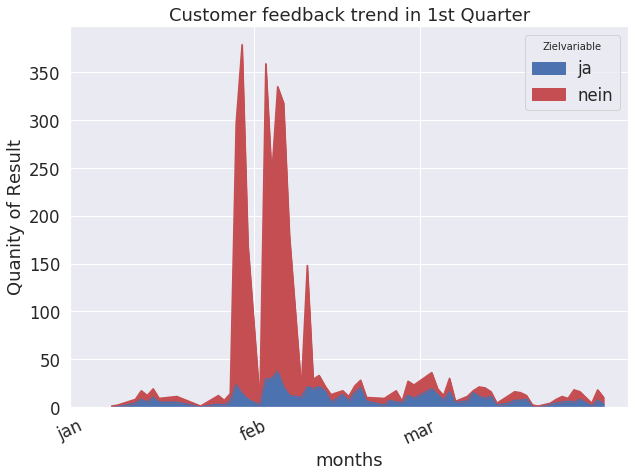

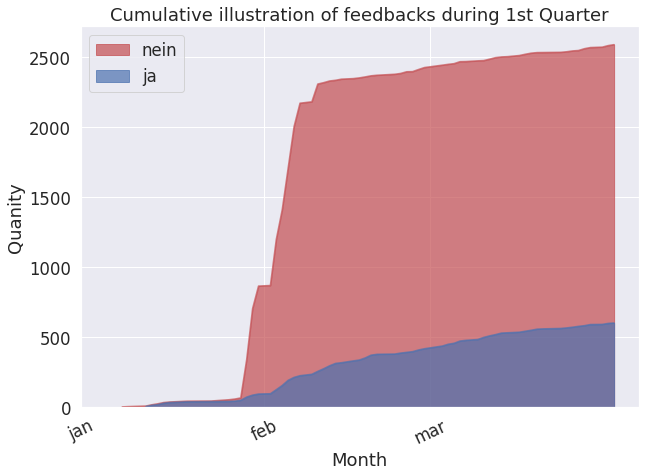

In [20]:
Q_months = ['jan'] + months[0:2]
Q_days = [0]+ days[0:2]
Quarter = Data.loc[Data['Monat'].isin(Q_months)]

pd.crosstab(Quarter.Day, Quarter.Zielvariable).plot(kind='area', figsize=(10,7), color=['b', 'r'])
plt.title('Customer feedback trend in 1st Quarter')
plt.xlabel('months')

x_tick_location = Q_days 
x_tick_labels = [mon for mon in Q_months]
x_tick_labels =  Q_months

plt.xticks(x_tick_location,x_tick_labels,rotation = '25')
plt.ylabel('Quanity of Result')

temp1 = Quarter.loc[Data['Zielvariable'] == 'ja'][['Day', 'Zielvariable']]
temp1 = temp1.groupby('Day').count()
temp1['ja'] = temp1['Zielvariable'].cumsum()

temp2 = Quarter.loc[Data['Zielvariable'] == 'nein'][['Day', 'Zielvariable']]
temp2 = temp2.groupby('Day').count()
temp2['nein'] = temp2['Zielvariable'].cumsum()

ax = temp2.plot(kind = 'area', y='nein', use_index=True, figsize=(10,7), color = 'r', alpha=0.7)
temp1.plot(kind = 'area', y='ja', ax=ax, color='b', alpha=0.7)

plt.title('Cumulative illustration of feedbacks during 1st Quarter')
plt.xlabel('Month')
plt.ylabel('Quantity')

x_tick_location = Q_days 
x_tick_labels = [mon for mon in Q_months]
x_tick_labels =  Q_months

plt.xticks(x_tick_location,x_tick_labels,rotation = '25')
plt.ylabel('Quanity');

In the first quarter of the year, the campaign has been started in the second week of January. The high season of the campaign in this quarter begins in the final week of January and lasts around 3 weeks. In other weeks of the quarter, the campaign activities subsides. 

The cumulative diagram shows the balance of the campaign result was positive in first three weeks of January before the high season of the campaign. But this balance turned to negative when campaign activities grows. So, applying more efficient customer intelligent strategies during the campaign may improve the obtained result. 

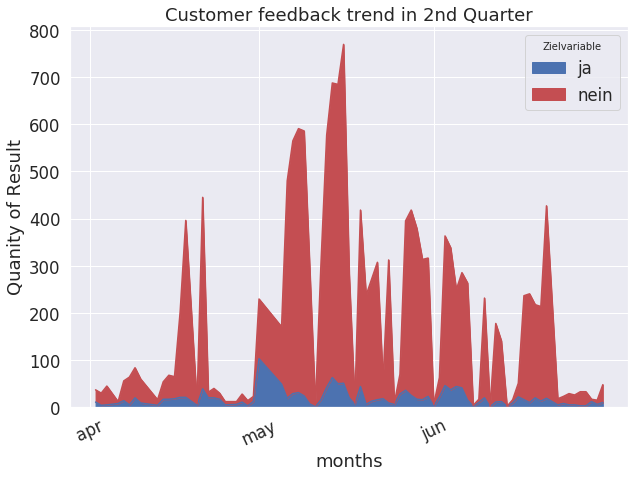

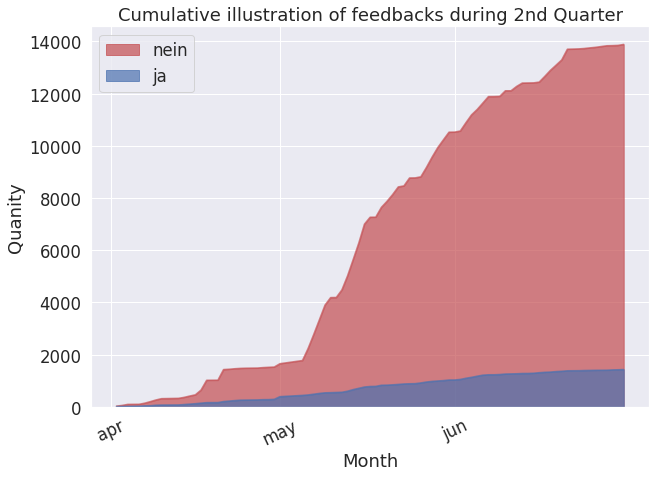

In [21]:
Q_months = months[2:5]
Q_days = days[2:5]
Quarter = Data.loc[Data['Monat'].isin(Q_months)]

pd.crosstab(Quarter.Day, Quarter.Zielvariable).plot(kind='area', figsize=(10,7), color=['b', 'r'])
plt.title('Customer feedback trend in 2nd Quarter')
plt.xlabel('months')

x_tick_location = Q_days 
x_tick_labels = [mon for mon in Q_months]
x_tick_labels =  Q_months

plt.xticks(x_tick_location,x_tick_labels,rotation = '25')
plt.ylabel('Quanity of Result')

temp1 = Quarter.loc[Data['Zielvariable'] == 'ja'][['Day', 'Zielvariable']]
temp1 = temp1.groupby('Day').count()
temp1['ja'] = temp1['Zielvariable'].cumsum()

temp2 = Quarter.loc[Data['Zielvariable'] == 'nein'][['Day', 'Zielvariable']]
temp2 = temp2.groupby('Day').count()
temp2['nein'] = temp2['Zielvariable'].cumsum()

ax = temp2.plot(kind = 'area', y='nein', use_index=True, figsize=(10,7), color = 'r', alpha=0.7)
temp1.plot(kind = 'area', y='ja', ax=ax, color='b', alpha=0.7)

plt.title('Cumulative illustration of feedbacks during 2nd Quarter')
plt.xlabel('Month')
plt.ylabel('Quantity')

x_tick_location = Q_days 
x_tick_labels = [mon for mon in Q_months]
x_tick_labels =  Q_months

plt.xticks(x_tick_location,x_tick_labels,rotation = '25')
plt.ylabel('Quanity');

The high season of the campaign along the second quarter of the year is in May which is the peak of the year as well. As it discussed earlier, although this month has the highest number of contacts, its success rate is the lowest which reveals the poor performance of the campaign in 

1. selecting the target customers properly 

**AND/OR**

2. effective execution of business intelligence strategies

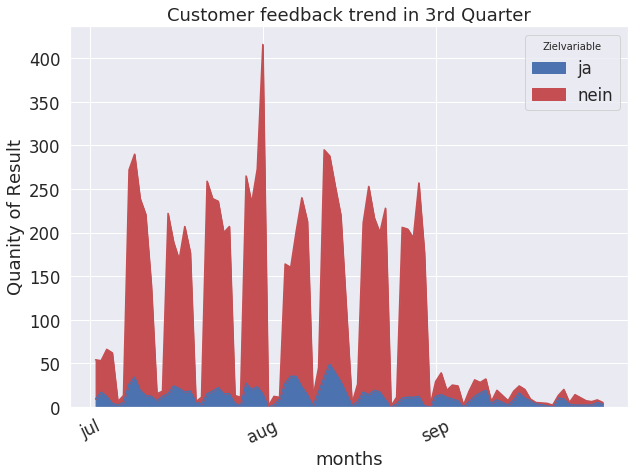

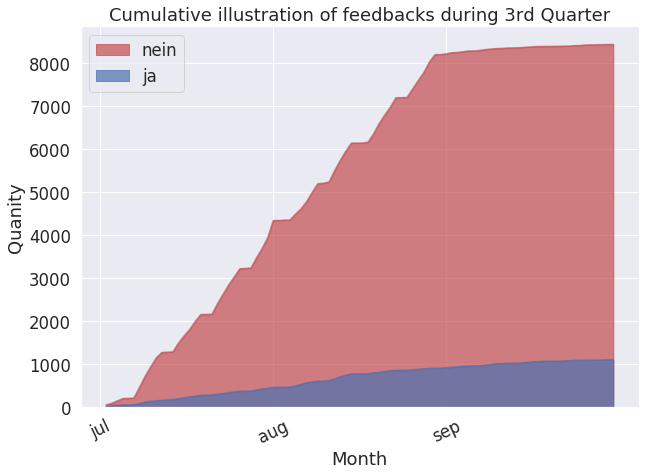

In [22]:
Q_months = months[5:8]
Q_days = days[5:8]
Quarter = Data.loc[Data['Monat'].isin(Q_months)]

pd.crosstab(Quarter.Day, Quarter.Zielvariable).plot(kind='area', figsize=(10,7), color=['b', 'r'])
plt.title('Customer feedback trend in 3rd Quarter')
plt.xlabel('months')

x_tick_location = Q_days 
x_tick_labels = [mon for mon in Q_months]
x_tick_labels =  Q_months

plt.xticks(x_tick_location,x_tick_labels,rotation = '25')
plt.ylabel('Quanity of Result')

temp1 = Quarter.loc[Data['Zielvariable'] == 'ja'][['Day', 'Zielvariable']]
temp1 = temp1.groupby('Day').count()
temp1['ja'] = temp1['Zielvariable'].cumsum()

temp2 = Quarter.loc[Data['Zielvariable'] == 'nein'][['Day', 'Zielvariable']]
temp2 = temp2.groupby('Day').count()
temp2['nein'] = temp2['Zielvariable'].cumsum()

ax = temp2.plot(kind = 'area', y='nein', use_index=True, figsize=(10,7), color = 'r', alpha=0.7)
temp1.plot(kind = 'area', y='ja', ax=ax, color='b', alpha=0.7)

plt.title('Cumulative illustration of feedbacks during 3rd Quarter')
plt.xlabel('Month')
plt.ylabel('Quantity')

x_tick_location = Q_days 
x_tick_labels = [mon for mon in Q_months]
x_tick_labels =  Q_months

plt.xticks(x_tick_location,x_tick_labels,rotation = '25')
plt.ylabel('Quanity');

During the third quarter of the year, the amount of the campaign activities experienced a questionable decrease in September that led to less growth of the success rate in that month (in September the border of the red/blue areas is more flat).

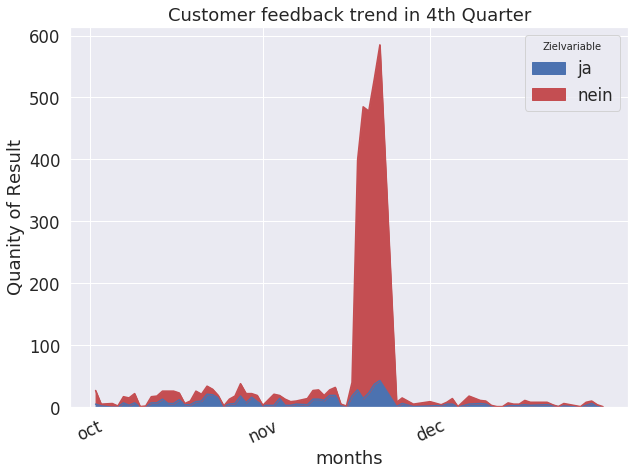

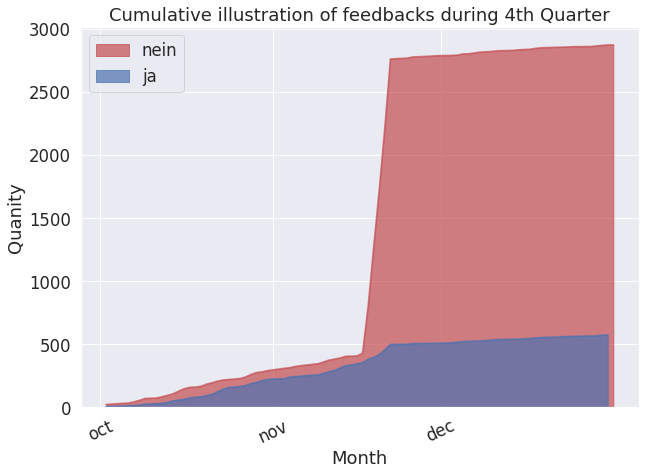

In [23]:
Q_months = months[8:11]
Q_days = days[8:11]
Quarter = Data.loc[Data['Monat'].isin(Q_months)]

pd.crosstab(Quarter.Day, Quarter.Zielvariable).plot(kind='area', figsize=(10,7), color=['b', 'r'])
plt.title('Customer feedback trend in 4th Quarter')
plt.xlabel('months')

x_tick_location = Q_days 
x_tick_labels = [mon for mon in Q_months]
x_tick_labels =  Q_months

plt.xticks(x_tick_location,x_tick_labels,rotation = '25')
plt.ylabel('Quanity of Result')

temp1 = Quarter.loc[Data['Zielvariable'] == 'ja'][['Day', 'Zielvariable']]
temp1 = temp1.groupby('Day').count()
temp1['ja'] = temp1['Zielvariable'].cumsum()

temp2 = Quarter.loc[Data['Zielvariable'] == 'nein'][['Day', 'Zielvariable']]
temp2 = temp2.groupby('Day').count()
temp2['nein'] = temp2['Zielvariable'].cumsum()

ax = temp2.plot(kind = 'area', y='nein', use_index=True, figsize=(10,7), color = 'r', alpha=0.7)
temp1.plot(kind = 'area', y='ja', ax=ax, color='b', alpha=0.7)

plt.title('Cumulative illustration of feedbacks during 4th Quarter')
plt.xlabel('Month')
plt.ylabel('Quantity')

x_tick_location = Q_days 
x_tick_labels = [mon for mon in Q_months]
x_tick_labels =  Q_months

plt.xticks(x_tick_location,x_tick_labels,rotation = '25')
plt.ylabel('Quanity');

Surprisingly, during the last quarter of the year, the campaign activities reduced intensively with the exception of the third week in November (Black Friday week).  

### Grouping customers based on their feedback to the last two campaigns for further analysis and comparisons:

In the original training data, there is some information about the feedback of the current customers to the last campaign as well ('Ergebnis letzte Kampagne' field). Combination of this information with the result of the current campaign ('Zielvariable' field) gives us this opportunity to **know our customers at a granular level based on their mind direction** in the following groups:

1. **Super Positive Customers**: are the customers who accepted both previous and the current campaigns.

2. **New Positive Customers**: are the customers who did not participate in the previous campaign and accepted the current campaigns.

3. **Negative to Positive Customers**: are the customers who refused the previous campaign but turned to positive answer in the current campaigns.



4. **Positive to Negative Customers**: are the customers who accepted the previous campaign but turned to negative answer in the current campaigns.

5. **New Negative Customers**: are the customers who did not participate in the previous campaign and refused the current campaigns.

6. **Super Negative Customers**: are the customers who refused both previous and the current campaigns.


7. **Unknown Customers**: Any other customers.

In [24]:
# Grouping the customers based on thier feedbacks to the previous and the current campaigns (thier mind direction)
Data['group'] = 'Unknown'

Data.group[(Data['Zielvariable'] == 'ja') & (Data['Ergebnis letzte Kampagne'] == 'Erfolg')] = 'Super Positive'
Data.group[(Data['Zielvariable'] == 'ja') & (Data['Ergebnis letzte Kampagne'] == 'Unbekannt')] = 'New Positive'
Data.group[(Data['Zielvariable'] == 'ja') & (Data['Ergebnis letzte Kampagne'] == 'Kein Erfolg')] = 'Negative to Positive'
Data.group[(Data['Zielvariable'] == 'nein') & (Data['Ergebnis letzte Kampagne'] == 'Erfolg')] = 'Positive to Negative'
Data.group[(Data['Zielvariable'] == 'nein') & (Data['Ergebnis letzte Kampagne'] == 'Unbekannt')] = 'New Negative'
Data.group[(Data['Zielvariable'] == 'nein') & (Data['Ergebnis letzte Kampagne'] == 'Kein Erfolg')] = 'Super Negative'

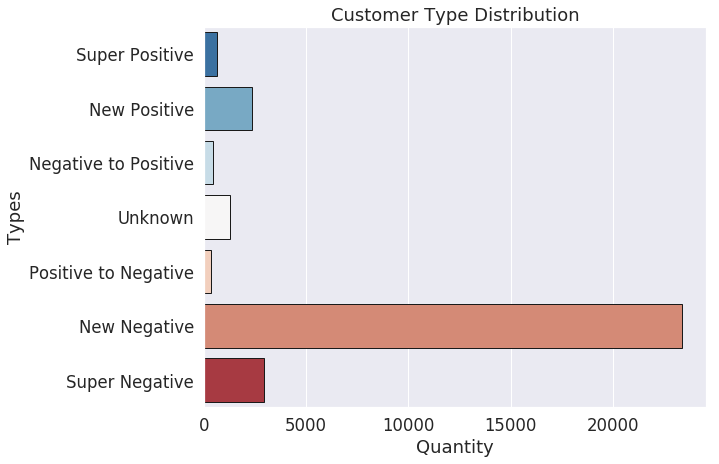

In [25]:
# Comparison of the groups quantities
fig, ax = plt.subplots(figsize=(9,7))

order = ['Super Positive', 'New Positive', 'Negative to Positive', 'Unknown',
         'Positive to Negative', 'New Negative', 'Super Negative']

sns.set_context(rc = {'patch.linewidth': 0.1})
sns.countplot(y='group', data=Data, palette=sns.color_palette("RdBu_r", 7), order=order, linewidth=1, edgecolor='k')

plt.title('Customer Type Distribution')
plt.ylabel('Types')
plt.xlabel('Quantity')
plt.show()

Here, we can see the biggest category of the customers is the **New Negative group** followed by **Super Negatives** and **New Positives**.

Now we can explore other features whithin provided customer groups:

For example, let us see how the account balance varies within different groups:

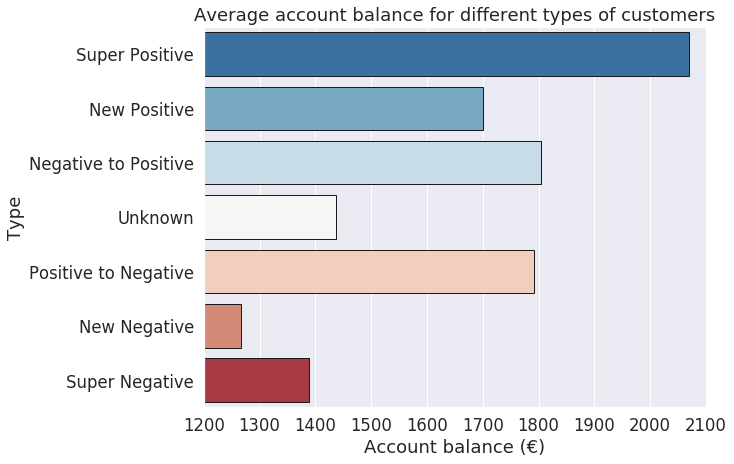

In [26]:
# Variation of account balance in different groups
temp = Data.groupby('group', as_index=False)['Kontostand'].mean()
fig, ax = plt.subplots(figsize=(9,7))
sns.set_context(rc = {'patch.linewidth': 0.1})
sns.barplot(y='group', x='Kontostand', data=temp, palette=sns.color_palette("RdBu_r", 7), order=order, linewidth=1, edgecolor='k')

plt.title('Average account balance for different types of customers')
plt.ylabel('Type')
plt.xlabel('Account balance (€)')
plt.xlim(1200,2100)
plt.show()

OK, it can be seen the positive customers have a higher account balance than the negative clients.

Lets see what is their difference in age:

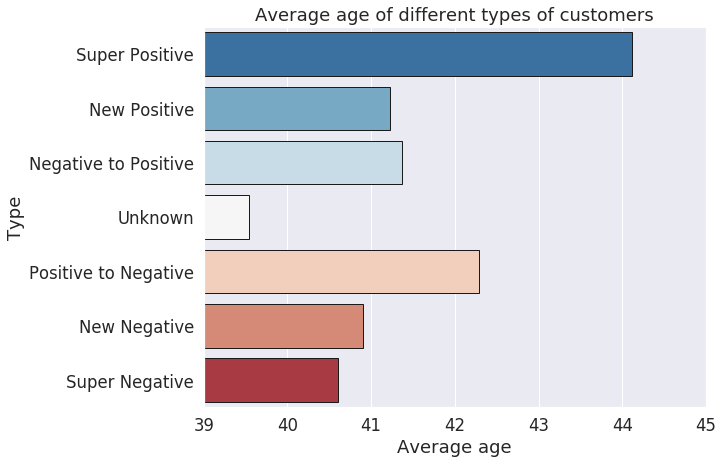

In [27]:
# Age variation in different groups
temp = Data.groupby('group', as_index=False)['Alter'].mean()
fig, ax = plt.subplots(figsize=(9,7))
sns.set_context(rc = {'patch.linewidth': 0.1})
sns.barplot(y='group', x='Alter', data=temp, palette=sns.color_palette("RdBu_r", 7), order=order, linewidth=1, edgecolor='k')

plt.title('Average age of different types of customers')
plt.ylabel('Type')
plt.xlabel('Average age')
plt.xlim(39,45)
plt.show()

The diagram shows positive clients are in average older than the negative customers.

So, the combination of our insights from last two diagrams may lead to this conclusion that **our best customers are not so young and their account status is better than the others**.

### Discovering who are these lovely super positive customers:

I this step, we can focus on **Super Positive Customers** to see what are their characteristics and if required make a comparion with the other groups w.r.t. that feature:

As an example, we can check job distribution in Super Positive Customers and compare it with Super Negative group:

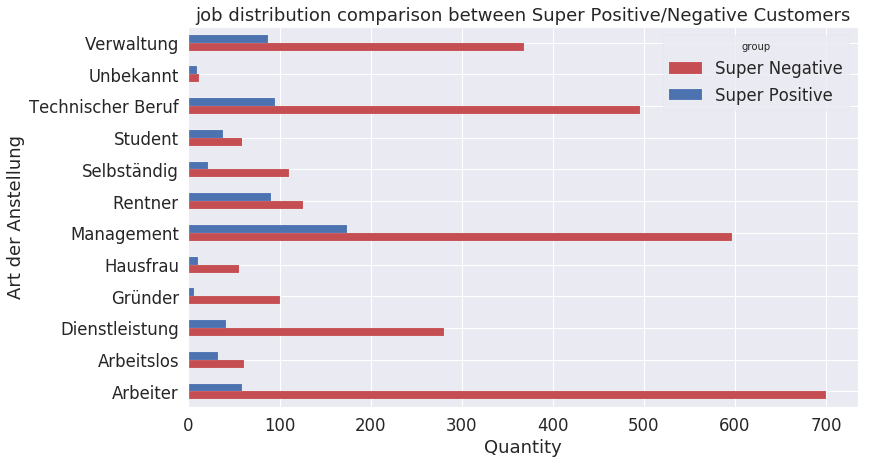

In [28]:
# Comparion of two groups based on their job
temp = Data[(Data['group'] == 'Super Positive') | (Data['group'] == 'Super Negative')]
pd.crosstab(temp['Art der Anstellung'],temp.group).plot(kind='barh', figsize=(12,7), color=['r', 'b'])
plt.title('job distribution comparison between Super Positive/Negative Customers')
plt.xlabel('Quantity')
plt.ylabel('Art der Anstellung');

Here we can see, the **<span style="color:green">'Management'</span>** is the top ranked job of **Super Positive Customers**, while  the **<span style="color:red">'Arbeiter'</span>** is the top ranked job of **Super Negative clients**.

We can also compare these two group based on the levels of education:

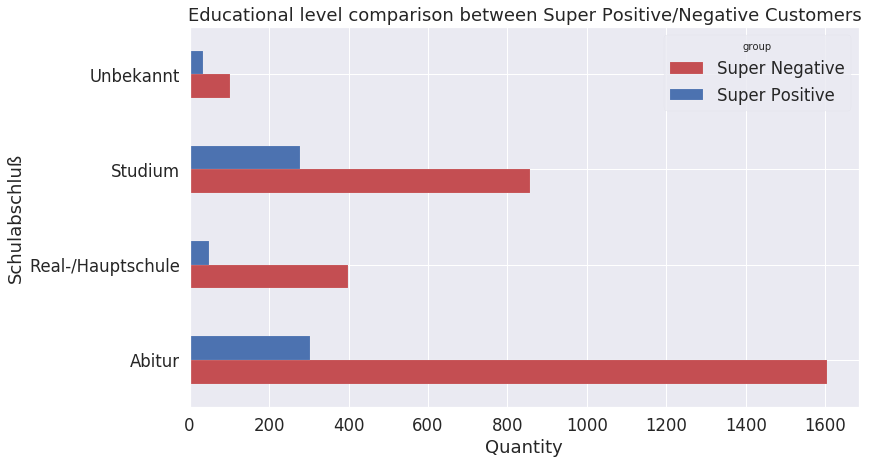

In [29]:
# Comparion of two groups based on their educational level
# Comparion of two groups based on their job
temp = Data[(Data['group'] == 'Super Positive') | (Data['group'] == 'Super Negative')]
pd.crosstab(temp['Schulabschluß'],temp.group).plot(kind='barh', figsize=(12,7), color=['r', 'b'])
plt.title('Educational level comparison between Super Positive/Negative Customers')
plt.xlabel('Quantity')
plt.ylabel('Schulabschluß');

In [30]:
# Some textual information about educational levels in Super positive/negative customers
sumP = len(Data.loc[Data['group'] == 'Super Positive', :])
abiturP = len(Data.loc[(Data['group'] == 'Super Positive') & (Data['Schulabschluß'] == 'Abitur'), :])
sumN = len(Data.loc[Data['group'] == 'Super Negative', :])
abiturN = len(Data.loc[(Data['group'] == 'Super Negative') & (Data['Schulabschluß'] == 'Abitur'), :])

print('Percentage of Super positive customers with Abitur: {:.2f}%'.format(abiturP/(sumP)*100))
print('Percentage of Super Negative customers with Abitur: {:.2f}%\n'.format(abiturN/(sumN)*100))


studiumP = len(Data.loc[(Data['group'] == 'Super Positive') & (Data['Schulabschluß'] == 'Studium'), :])
studiumN = len(Data.loc[(Data['group'] == 'Super Negative') & (Data['Schulabschluß'] == 'Studium'), :])

print('Percentage of Super positive customers with Studium: {:.2f}%'.format(studiumP/(sumP)*100))
print('Percentage of Super Negative customers with Studium: {:.2f}%'.format(studiumN/(sumN)*100))

Percentage of Super positive customers with Abitur: 45.63%
Percentage of Super Negative customers with Abitur: 54.15%

Percentage of Super positive customers with Studium: 41.72%
Percentage of Super Negative customers with Studium: 28.91%


As it can be seen, while the majority (54.15 %) of **Super Negative clients** have a **Diploma (Abitur)**, a higher proportion in **Super Positive Customers** has an academic certificate **(Studium)** (41.72 % in SP customers versus 28.91% in SN clients).

In [31]:
# Dropping the columns that we add to the data for visualization purposes.
# The information provided in these columns are extracted from the original columns so dropping them is not harmful
Data.drop(['Day'], axis = 1, inplace = True)
Data.drop(['group'], axis = 1, inplace = True)

### Data Preprocessing:

As one the objectives of the project is to define, train and evaluate some predictive models on the data and most of those models are just able to understand and work with *numerical values*, in this step we convert our categorical fields with '**object**' data type into most proper numerical values. In the following steps we'll perform such a conversion:

### Conversion of `Zielvariable` feature into boolean values {0,1}

Since we would like to plot the relationship between our target (**Zielvariable**) and some other features, we need to convert target values into numerical representation of binary labels:

**Zielvariable**:

nein $\Longrightarrow$ 0

ja $\Longrightarrow$ 1

In [32]:
Zielvariable_conversion = {"Zielvariable": {"nein": 0, "ja": 1}}
Data.replace(Zielvariable_conversion, inplace=True)

### one-hot-encoding of the field 'Monat':
---

A possible approach to convert the data type of the field **Monat** from categorial to numercal data type is to use **naive variable encoding** technique as follows: 

**Monat**:

jan $\Longrightarrow$ 1

feb $\Longrightarrow$ 2

mar $\Longrightarrow$ 3

apr $\Longrightarrow$ 4

may $\Longrightarrow$ 5

jun $\Longrightarrow$ 6

jul $\Longrightarrow$ 7

aug $\Longrightarrow$ 8

sep $\Longrightarrow$ 9

oct $\Longrightarrow$ 10

nov $\Longrightarrow$ 11

dec $\Longrightarrow$ 12

But this may lead to misinterpretation of those values by machine learning models such that the model would think that for example the category of “apr” is greater than “jan” that obviously has no sense.

To prevent such a misinterpretation, we use **one hot encoding** to convert *Monat* values into numerical ones:

In [33]:
### Monat one-hot Encoding ###

# Get one hot encoding of columns 'Monat'
Monat_one_hot = pd.get_dummies(Data.Monat)
# Drop column 'Monat' as it is now encoded
Data.drop('Monat',axis = 1, inplace=True)
# Join the encoded Monat fields
Data = Data.join(Monat_one_hot)

The same can be done with **Art der Anstellung, Familienstand** and **Schulabschluß** fields: 

In [34]:
###  one-hot encoding of the fields:
### 'Art der Anstellung', 'Familienstand', 'Schulabschluß', 'Kontaktart' & 'Ergebnis letzte Kampagne'

# make a difference between 'Anstellung_unbekannt', 'Schulabschluß_unbekannt' and 'Kontaktart_Unbekannt'
Data.loc[Data['Art der Anstellung'] == 'Unbekannt', 'Art der Anstellung'] = 'Anstellung_Unbekannt'
Data.loc[Data['Schulabschluß'] == 'Unbekannt', 'Schulabschluß'] = 'Schulabschluß_Unbekannt'
Data.loc[Data['Kontaktart'] == 'Unbekannt', 'Kontaktart'] = 'Kontaktart_Unbekannt'

# for more clarification of values in 'Ergebnis letzte Kampagne' field we change them as follows
Data.loc[Data['Ergebnis letzte Kampagne'] == 'Unbekannt', 'Ergebnis letzte Kampagne'] = 'letzte Ergebnis Unbekannt'
Data.loc[Data['Ergebnis letzte Kampagne'] == 'Kein Erfolg', 'Ergebnis letzte Kampagne'] = 'letzte Ergebnis Kein Erfolg'
Data.loc[Data['Ergebnis letzte Kampagne'] == 'Sonstiges', 'Ergebnis letzte Kampagne'] = 'letzte Ergebnis Sonstiges'
Data.loc[Data['Ergebnis letzte Kampagne'] == 'Erfolg', 'Ergebnis letzte Kampagne'] = 'letzte Ergebnis Erfolg'


columns = ['Art der Anstellung', 'Familienstand', 'Schulabschluß', 'Kontaktart', 'Ergebnis letzte Kampagne']

for col in columns: 
    # Get one hot encoding of the column
    col_one_hot = pd.get_dummies(Data[col])
    # Drop column as it is now encoded
    Data.drop(col,axis = 1, inplace=True)
    # Join the encoded Monat fields
    Data = Data.join(col_one_hot)

In [35]:
# Variable Encoding of the fields 'Gechlecht', 'Ausfall Kredit', 'Kredit', 'Haus' as we did for 'Zielvariable' before

Geschlecht_conversion = {"Geschlecht": {"w": 0, "m": 1}} 
Data.replace(Geschlecht_conversion, inplace=True)

columns = ['Ausfall Kredit', 'Kredit', 'Haus']

for col in columns: 
    conversion = {col: {"nein": 0, "ja": 1}} 
    Data.replace(conversion, inplace=True)

## Feature Selection and Feature Engineering:

This step often has the highest returns on time invested in a machine learning problem. It can take quite a while to get right, but is often more important than the exact algorithm and hyperparameters used for the model. If we don't feed the model the correct data, then we are setting it up to fail and we should not expect it to learn. 

1. **Feature Selection**: is the process of choosing the most relevant features in the data. "Most relevant" can depend on many factors, but it might be something as simple as the highest correlation with the target, or the features with the most variance. In feature selection, we remove features that do not help our model to learn the relationship between features and the target. This can help the model generalize better to new data and results in a more interpretable model. Generally, the feature selection is the process of __subtracting__ less important features.


2. **Feature Engineering**: is defined as the process of taking raw data and extracting or creating new features that allow a machine learning model to learn a mapping between these features and the target. This means taking transformations of variables, such as we did with the one-hot encoding categorical variables so they can be used in a model. Generally, one may think of the feature engineering as __adding__ additional features derived from the raw data.

### Feature Selection

**Stammnummer** and **Anruf-ID** fields have unique or near unique values and as we know  due to high variance of its values, such an information does not help any model to make a reliable prediction. So we can remove them from our training data.

In [36]:
Data.drop(['Stammnummer'], axis = 1, inplace = True)
Data.drop(['Anruf-ID'], axis = 1, inplace = True)

### Removing Multi-colinearities:

Correlated features in general don't improve models (although it depends on the specifics of the problem like the number of variables and the degree of correlation), but they affect specific models in different ways and to varying extents:

* For linear models (e.g., linear regression or logistic regression), multicolinearity can yield solutions that are wildly varying and possibly numerically unstable.

* Random forests can be good at detecting interactions between different features, but highly correlated features can mask these interactions.

More generally, a simpler model is preferable, and, in some sense, a model with fewer features is simpler.

### Collineararity Ellimination

While variables in a dataset are usually correlated to a small degree, highly collinear variables can be redundant in the sense that we only need to retain one of the features to give our model the necessary information.

Removing collinear features is a method to reduce model complexity by decreasing the number of features and can help to increase model generalization. It can also help us to interpret the model because we only have to worry about less variables.

There are a number of methods for removing collinear features, such as using the [Variance Inflation Factor](http://www.statisticshowto.com/variance-inflation-factor/). We will use a simple metric, and remove features that have a correlation coefficient above a certain threshold (in our case 0.5) with each other (not with the target variable because we want variables that are highly correlated with the target variable)

The following function prints out all the collinear features based on a threshold we select for the correlation coefficients.

In [37]:
def show_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations that are realted to the target variable
    x = x.drop(columns = ['Zielvariable'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])
               
    return 0

In [38]:
show_collinear_features(Data, 0.5);

Studium | Management | 0.59
Studium | Abitur | 0.66
letzte Ergebnis Kein Erfolg | Tage seit letzter Kampagne | 0.7
letzte Ergebnis Unbekannt | Tage seit letzter Kampagne | 0.87
letzte Ergebnis Unbekannt | Anzahl Kontakte letzte Kampagne | 0.5
letzte Ergebnis Unbekannt | letzte Ergebnis Kein Erfolg | 0.74


Based on what we see here, **Studium** field has strong correlations with **Management** and **Abitur** features. That sounds reasonable because it is very likely that managers are high-educated (positive correlation) and customers who are high-educated do not state that their education level is 'Abitur' (Diploma in Germany).

So, we may remove **Studium** feature, since it seems it duplicates the information that we have in other features.

In addition, **letzte Ergebnis Unbekannt** feature is in a high correlation with three other features. So, we can remove it as well.

In [39]:
Data.drop(['Studium'], axis = 1, inplace = True)
Data.drop(['letzte Ergebnis Unbekannt'], axis = 1, inplace = True)

### Correlation Discovery:

Now that our training data is ready for more numerical analysis, we can take a look at the **corrlation strength** between all the features and the target value:

In [40]:
Data.corr()['Zielvariable'][1:].sort_values(ascending=False)

Dauer                              0.39
letzte Ergebnis Erfolg             0.30
Handy                              0.14
mar                                0.13
oct                                0.13
sep                                0.12
Tage seit letzter Kampagne         0.10
Anzahl Kontakte letzte Kampagne    0.08
Rentner                            0.08
Student                            0.07
dec                                0.07
single                             0.06
apr                                0.06
Kontostand                         0.06
feb                                0.04
Management                         0.04
letzte Ergebnis Sonstiges          0.04
Alter                              0.03
Festnetz                           0.01
Arbeitslos                         0.01
letzte Ergebnis Kein Erfolg        0.01
geschieden                         0.01
Geschlecht                         0.01
Verwaltung                         0.01
Schulabschluß_Unbekannt            0.01


It is more interesting to plot those values in a bar chart:

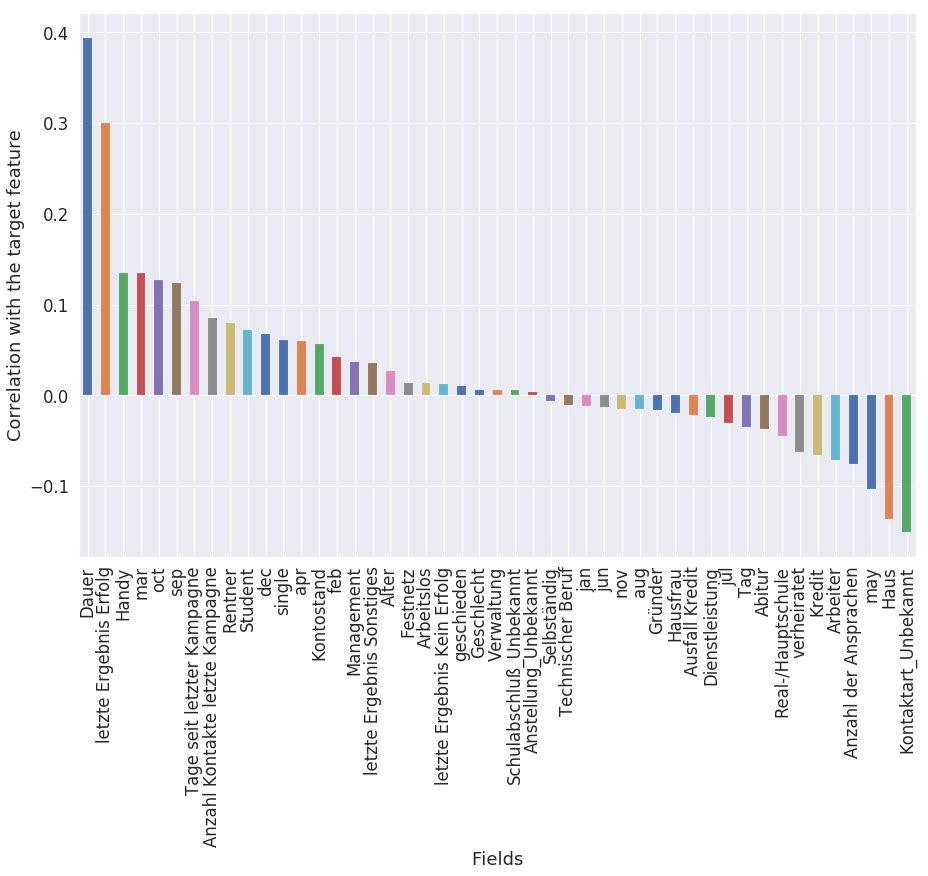

In [41]:
# I used '[2:]' to exclude 'Zielvariable' itself
# I also used sort_values(ascending=False) to sort correlation in a descending order
fig = Data.corr()['Zielvariable'][1:].sort_values(ascending=False).plot.bar(figsize = (15,10))
fig.set(xlabel='Fields', ylabel='Correlation with the target feature');

The following insights can be understood from our correlation bar chart:

1. The <span style="color:green">**call duration (Dauer)**</span> has a positive influence on response of the customer to the campaign. The longer we talk to the customer, the higher the possibility of his/her positive feedback to the campaign.

2. <span style="color:green">**letzte Ergebnis Erfolg**</span> has an strong correlation with the target. So, the likelihood of the campaign success is more for the customers who have <span style="color:green">**accepted the previous campaign**</span>, too (remeber those lovely super positive clients?).

3. Concering the correlation of the type of the contact, <span style="color:black">**Handy>Festnetz>Unbekannt**</span>. It's a good idea, to call the customers on their <span style="color:green">**mobile phone**</span> rather than a <span style="color:red">**fixed number**</span>.

4. Some months of the year such as <span style="color:green">**March, October** </span>and <span style="color:green">**September**</span> are the best time to call the customers.

5. Since both the <span style="color:green">**Tage seit letzter Kampagne & Anzahl Kontakte letzte Kampagne**</span> have a positive correlations with the target, it's a good idea to call the customers whom we did not call for a while and were strongly involved in the last campaign.

6. It's beneficial to concentrate on <span style="color:green">**retired customers**</span> as well as customers who are <span style="color:green">**student**</span>.

7. For <span style="color:green">**single customers**</span> it's more likely to accept the campaign than the ones who are <span style="color:red">**married**</span> (being single has a positive correlation with the target, while being married has a negative correlation with the target)

8. Customers with <span style="color:green">**more account balance**</span> are easier to be convinced.

9. <span style="color:green">**Older**</span> customers may accept the campaign more than the <span style="color:red">**young**</span> ones.

10. There is not much difference between men and women. So, the customer <span style="color:blue">**gender**</span> is not the point and can be removed.

11. The call at the <span style="color:green">**begining of the month**</span> is more likely to be successful.

12. Having <span style="color:red">**a negative credit relationship**</span> in the past has a negative influence on the target achievement.

13. <span style="color:red">**Calling**</span> the customer <span style="color:red">**several times**</span>, may have a bad influence on the customer's opinion about the campaign.

14. It is more likely to be successful when the customer does not <span style="color:red">**own a property**</span>.

15. Calling the <span style="color:green">**managers**</span> directly is a better idea than calling <span style="color:red">**employees**</span>.

Since both the positive and negative correlations indicate a relation between the associated feature and the target, we should consider the absolute value of correlations:

In [42]:
 Data.corr()['Zielvariable'][1:].abs().sort_values(ascending=False)

Dauer                             0.39
letzte Ergebnis Erfolg            0.30
Kontaktart_Unbekannt              0.15
Haus                              0.14
Handy                             0.14
mar                               0.13
oct                               0.13
sep                               0.12
Tage seit letzter Kampagne        0.10
may                               0.10
Anzahl Kontakte letzte Kampagne   0.08
Rentner                           0.08
Anzahl der Ansprachen             0.08
Student                           0.07
Arbeiter                          0.07
dec                               0.07
Kredit                            0.07
verheiratet                       0.06
single                            0.06
apr                               0.06
Kontostand                        0.06
Real-/Hauptschule                 0.04
feb                               0.04
Management                        0.04
Abitur                            0.04
letzte Ergebnis Sonstiges

Again we can take a look at the bar chart to see the importance order of the features:

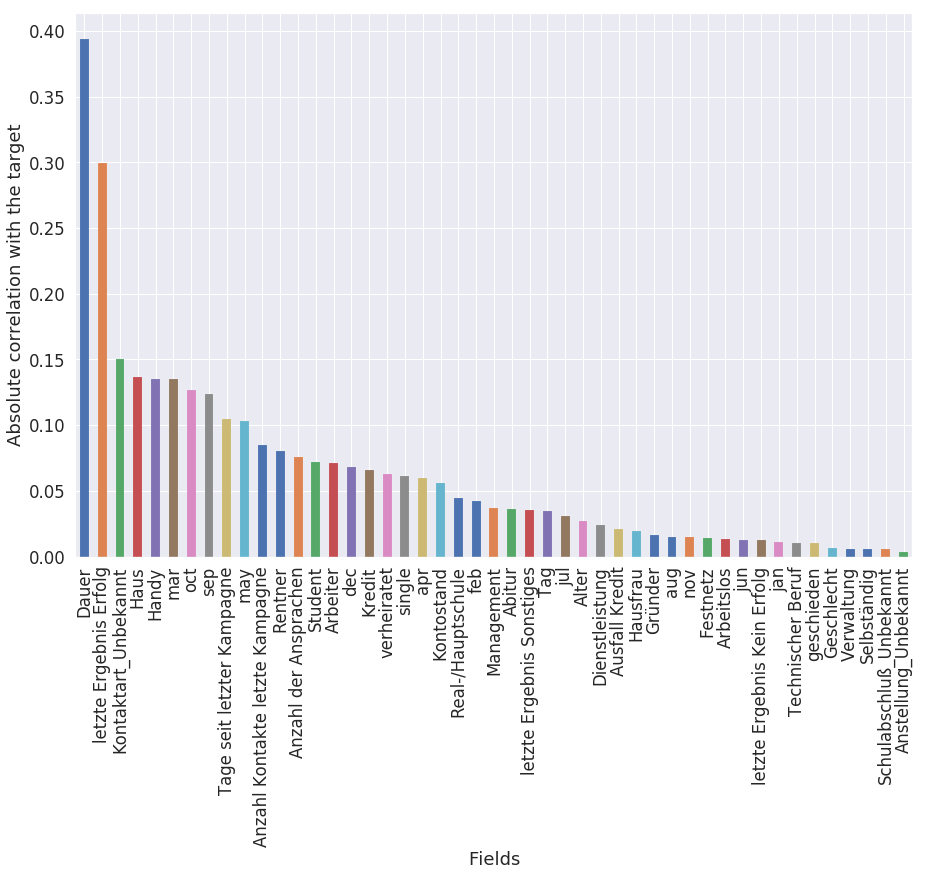

In [43]:
# I used '[2:]' to exclude 'Zielvariable' itself
# I also used sort_values(ascending=False) to sort correlation in a descending order
fig = Data.corr()['Zielvariable'][1:].abs().sort_values(ascending=False).plot.bar(figsize = (15,10))
fig.set(xlabel='Fields', ylabel='Absolute correlation with the target');

In order to select most important features, we use the following function to set a threshold (here 0.05) and choose all the features that their importance coefficients is above the threshold:

In [44]:
def high_features(data, threshold):
    names = []
    for idx , val in ranking.iteritems():
        if val >= threshold:
            names.append(idx)
    return names     

In [45]:
ranking = Data.corr()['Zielvariable'][1:].abs().sort_values(ascending=False)
myCols = high_features(ranking, 0.05)
myCols   

['Dauer',
 'letzte Ergebnis Erfolg',
 'Kontaktart_Unbekannt',
 'Haus',
 'Handy',
 'mar',
 'oct',
 'sep',
 'Tage seit letzter Kampagne',
 'may',
 'Anzahl Kontakte letzte Kampagne',
 'Rentner',
 'Anzahl der Ansprachen',
 'Student',
 'Arbeiter',
 'dec',
 'Kredit',
 'verheiratet',
 'single',
 'apr',
 'Kontostand']

The above selection of the features is our selection based on **correlation coefficients** of the features with the target. We will refer to this set of features as <span style="color:red">**myCols**</span> in the following sections. 

### Normalization

It is important to normalize our features so that they can have approximately same scale and be comparable. This also prevents high values dominate the low values so, the model can learn from all the features. Normalization specially helps the convergence of the optimization process within the models. This is also more important for some model such as SVM, neural network and KNN.

In [46]:
from sklearn.preprocessing import MinMaxScaler

# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

X = Data.drop(columns='Zielvariable')
y = pd.DataFrame(Data['Zielvariable'])
dataCols = X.columns

scaler.fit(X)
X = scaler.transform(X)

Data = pd.DataFrame(X, columns=dataCols)
Data['Zielvariable'] = y

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [47]:
# decreasing binary features type accuracy for a more efficient memory usage
for col in Data.columns:
    if len(Data[col].unique()) == 2:
        Data[col]= Data[col].astype('uint8') 

---

## Splitting the data Into Training and Test Sets

In machine learning, we always need to separate our features into two sets:

1. __Training set__ which we provide to our model during training along with the answers so it can learn a mapping between the features and the target. 
2. __Test (validation) set__ which we use to evaluate the mapping learned by the model. The model has never seen the answers on the test set, but instead, must make predictions using only the features. As we know the true answers for the test set, we can then compare the test predictions to the true test targets to ghet an estimate of how well our model will perform when deployed in the real world. 

In [48]:
# Separate out the features and targets
# on the original data
def orgData(Data):
    X = Data.drop(columns='Zielvariable')
    y = pd.DataFrame(Data['Zielvariable'])
    dataCols = X.columns

    X_values = X.values
    y_values = np.array(y).reshape((-1,))

    X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size = 0.2, random_state = 0)
    return [dataCols, X_train, X_test, y_train, y_test]

In [49]:
# Separate out the features and targets
# on the data that includes only 'myCols' features
def myData(Data):
    X = pd.DataFrame(Data[myCols])
    y = pd.DataFrame(Data['Zielvariable'])
    dataCols = X.columns

    X_values = X.values
    y_values = np.array(y).reshape((-1,))

    X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size = 0.2, random_state = 0)
    return [X_train, X_test, y_train, y_test]

### Using Synthetic Minority Over-sampling Technique (SMOTE) to overcome the imbalanced label problem

To overcome the previously discovered label imbalance problem in the training data, we can use the **Synthetic Minority Over-sampling Technique (SMOTE)** algorithm to create synthetic samples from the minor class.

In [50]:
from imblearn.over_sampling import SMOTE

def smoteData(Data):
    [dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

    smote = SMOTE(random_state=0)

    smote_data_X,smote_data_y = smote.fit_sample(X_train, y_train)

    smote_data_X = pd.DataFrame(data=smote_data_X,columns=dataCols)
    smote_data_y = pd.DataFrame(data=smote_data_y,columns=['Zielvariable'])

    X_train_smote = smote_data_X.values
    y_train_smote = smote_data_y.values
    y_train_smote = y_train_smote.reshape((-1,))

    return [X_train_smote, X_test, y_train_smote, y_test]

Using TensorFlow backend.


**Note:** In this function, oversampling is performed while the test data is excluded, So, no test data information is exploited for model training.

So we have three functions that can be used to split different kinds of the data into training and test sets:

1. **orgData** that splits the original version of the data into training and test samples.

2. **myData** that splits a version of the data into training and test samples that includes only **myCols** features (features that are chosen based oh their correlations with the target).

3. **smoteData** that splits a version of the data into training and test samples that includes over-sampled minority class and is balanced w.r.t. our binary labels.

At the beginning of each training process, one of these functions will be used to prepare the data.

## Training some models (binary classifiers) on the data:

In this part, we train some models such as logistic regression and Random Forest to see how much better do they perform than our baseline random guess:

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_selection import RFE,RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, make_scorer
from sklearn.metrics import roc_curve, precision_recall_curve, auc, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

### Baseline establishment:

It's important to establish a naive baseline before we training machine learning models. If the models we build cannot outperform a naive guess then we might have to admit that machine learning is not suited for this problem. Possible reasons for such a situation would be not using the right models, need for more data, existence of a simpler solution that does not require machine learning.

For a binary classification task, a good naive baseline is to select one of two possible labels with the probability of 50%. This is simple to implement and sets a relatively low bar for our models: if they cannot do better than guessing the medin value, then we will need to rethink our approach.

To be sure that our data is splitted correctly, we may check if two sets of training and test data have an equal proportion of positive samples:

In [52]:
[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

print('percentage of positive labels in training data: {:.2f}%' . format(sum(y_train)/len(y_train)*100))
print('percentage of positive labels in test data: {:.2f}%' . format(sum(y_test)/len(y_test)*100))

percentage of positive labels in training data: 11.76%
percentage of positive labels in test data: 11.72%


In [53]:
y_baseline = np.random.randint(2, size=len(y_test))

Before going further we have to think about the meaning and the importance of two concepts in our problem:

1. **False Positive predictions (Type I error)**: means we wrongly classified negative customers (who will reject the campaign) as positive customers (who will accept the campaign). The consequence of such a wrong prediction, is to waste our time to contact those customers and get a rejection. Not so bad.


2. **False Negative predictions (Type II error)**: means we wrongly classified positive customers (who will accept the campaign) as negative customers (who will reject the campaign). The consequence of such a wrong prediction, is to not contact good customers and lose an excellent sale opportunity. That is not the situation that your manager wants to deal with. Too dangerous!

So, we should take a measure that is cautious about the **False Negative** rate which is **recall**.

Now, we can evaluate the baseline guess recall score on the test set: 

In [54]:
recall = recall_score(y_test, y_baseline)
print("Baseline Performance on the test set: %.2f%%" % (recall * 100.0))

Baseline Performance on the test set: 49.86%


Here we introduce some extra fuctions that are reponsible for the rest of the process:

In [55]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm[[0, 1]] = cm[[1, 0]] # swapping rows
    cm[:,[1,0]] = cm[:,[0,1]] # swapping cols
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [56]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [57]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    """
    This function trains the input model on the data, evaluates the model performance on the test set,
    plots the confusion matrix of the model and finally reports the model recall score on the test data
    """
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, classes=np.array(['Ja', 'Nein']), normalize=True)
    plt.grid(None)
    print('\n', classification_report(y_test, y_pred, target_names=np.array(['Ja', 'Nein']), labels = [1, 0]))

    print("Dimensions of training data: {}" .format(X_train.shape))
    
    recall = recall_score(y_test, y_pred)
    print("Recall: %.2f%%" % (recall * 100.0))
    
    return model, (recall * 100.0)

In [58]:
def grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, refit_score):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=5)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    
    
    grid_search.fit(X_train, y_train)

    # make the predictions
    y_pred = grid_search.predict(X_test)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    #plot_confusion_matrix(y_test, y_pred, classes=np.array(['Ja', 'Nein']), normalize=True)
    #plt.grid(None)
    #print('\n', classification_report(y_test, y_pred, target_names=np.array(['Ja', 'Nein']), labels = [1, 0]))

    #print("Dimensions of training data: {}" .format(X_train.shape))
    
    #recall = recall_score(y_test, y_pred)
    #print("Recall: %.2f%%" % (recall * 100.0))
    
    return grid_search

In [59]:
def plotROC(model, X_train, y_Train, X_test, y_Test, typ=1):
    """
    this function plots the ROC curve of a trained model on the test data
    and reports the Area Under Curve (AUC) for it.
    """
    if typ == 1:
        y_pred = model.predict_proba(X_test)
        # keep probabilities for the positive outcome only
        y_pred = y_pred[:, 1]
    else:
        y_pred = model.decision_function(X_test)
    
    
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    fig, ax = plt.subplots(figsize=(9,6))
    lw = 2
    ax.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.plot([0, 0], [0, 1], 'k-') # right
    ax.plot([1, 0], [0, 0], 'k-') # down
    ax.plot([1, 1], [0, 1], 'k-') # left
    ax.plot([1, 0], [1, 1], 'k-') # up
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve of the current classifier')
    plt.legend(loc="lower right")
    plt.show()  

In [60]:
from sklearn.metrics import roc_curve, auc

def checkThresh(clf, X_test, y_test, typ = 1, prt=0):
    
    """
    this function plots the ROC curve of a trained model on the test data
    against nine different thresholds {0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9} for classification probability thresholding 
    """
    
    TSs = []
    TPs = []
    FPs = []
    for threshold in np.arange(0.1, 1, 0.1):
        TSs.append(round(threshold,2))
        
        if typ == 1:
            predicted_proba = clf.predict_proba(X_test)
            y_pred = (predicted_proba [:,1] >= threshold).astype('int')
        else:
            predicted_proba = clf.decision_function(X_test)
            y_pred = (predicted_proba >= threshold).astype('int')
       
    
        cm = confusion_matrix(y_test, y_pred)
        
        FN = cm[0][0] / (cm[0][0] + cm[0][1])
        FP = cm[0][1] / (cm[0][0] + cm[0][1])
        FPs.append(FP)
        TN = cm[1][0] / (cm[1][0] + cm[1][1])
        TP = cm[1][1] / (cm[1][0] + cm[1][1])
        TPs.append(TP)
        
        if prt:
            print('Threshold: {:.1f}, TP: {:.2f}, TN: {:.2f} , FP: {:.2f}, FN: {:.2f} %' 
              .format(threshold, TP, FN, FP, TN))

    fig, ax = plt.subplots(figsize=(9,6))
    ax.scatter( x=FPs, y=TPs , label='ROC Convex Hall')
    ax.plot([0, 1], [0, 1], 'k--') # diag
    ax.plot([0, 0], [0, 1], 'k-') # right
    ax.plot([1, 0], [0, 0], 'k-') # down
    ax.plot([1, 1], [0, 1], 'k-') # left
    ax.plot([1, 0], [1, 1], 'k-') # up
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC convex hull for different thresholds on the current classifier')

    for i, label in enumerate(TSs):
        ax.annotate(label, (FPs[i]+0.01, TPs[i]+ 0.005), fontsize=14)

    plt.show()

In [61]:
# A Dataframe to hold the results
results = pd.DataFrame({'model': ['Logistic Regression', 'Random Forest', 'Support Vector Machine', 'Extra Trees', 
                                           'Gradient Boosting', 'Xgboost'] })
results['orgDataDefault'] = ''
results['myColsDefault'] = ''
results['orgDataOptimal'] = ''
results['myColsOptimal'] = ''
results['orgDataOptimalRFE'] = ''
results['smoteDataDefault'] = ''
results['smoteDataOptimal'] = ''
results['smoteDataOptimalRFE'] = ''

### Training steps for each model:

In the following section, I train several machine learning models including:

1. Logistic Regression (LR) *
2. Random Forest Classifier (RFC) *
3. Support Vector Classifier (SVC) *
4. Extra Trees Classifier (ETC) *
5. Gradient Boosting Classifier (GBC) +
6. eXtreme Gradient Boosting (XGBoost) +

(*): models that have an explicit parameter to handle imbalanced label problem (class_weight='balanced')

(+): models that don't have an explicit parameter to handle imbalanced label problem

Processing steps on (*) models:

1. Training the model with the default hyper parameters on the original Data (orgData) and plotting the results.
2. Training the model with the default hyper parameters on previously selected features (myData) and plotting the results.
3. Execution of the Grid Search Cross Validation technique for tuning model hyper parameters (finding optimal hyper parameters).
4. Training the model with the optimal hyper parameters on the original Data (orgData) and plotting the results.
5. Training the model with the optimal hyper parameters on previously selected features (myData) and plotting the results.
6. Runnig the Recursive Feature Elimination (RFE) method with cross-validation as the second feature selection approach.
7. Training the model with the optimal hyper parameters on the resulting features of the RFE process on orgData and plotting the results.



Processing steps on (+) models:

1. Training the model with the default hyper parameters on the balanced Data (smoteData) and plotting the results.
2. Execution of the Grid Search Cross Validation technique for tuning model hyper parameters (finding optimal hyper parameters).
3. Training the model with the optimal hyper parameters on the balanced Data (smoteData) and plotting the results.
4. Running the Recursive Feature Elimination (RFE) method with cross-validation as the second feature selection approach.
5. Training the model with the optimal hyper parameters on the resulting features of the RFE process on the balanced Data (smoteData) and plotting the results.

### Model # 1: Logistic Regression


               precision    recall  f1-score   support

          Ja       0.42      0.81      0.56       738
        Nein       0.97      0.85      0.91      5558

   micro avg       0.85      0.85      0.85      6296
   macro avg       0.70      0.83      0.73      6296
weighted avg       0.91      0.85      0.87      6296

Dimensions of training data: (25184, 47)
Recall: 81.30%


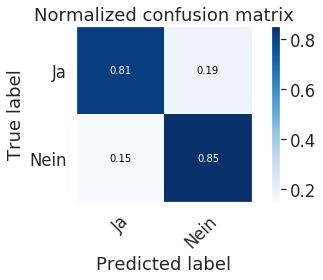

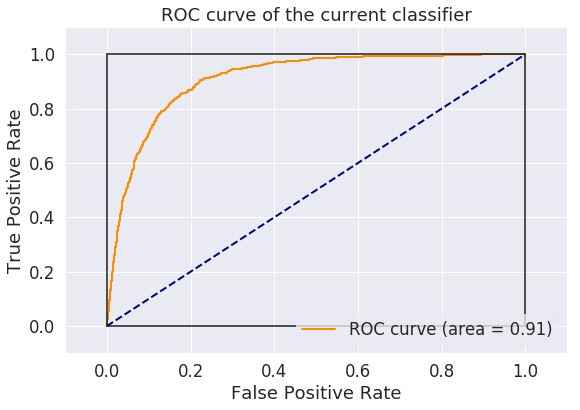

In [62]:
# First model (Logistic Regression) definition, training and evaluation 
# on the original data (orgData)
# with default hyper parameters

[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

logreg = LogisticRegression(random_state=0, class_weight='balanced')

logreg, results.at[0, 'orgDataDefault']  = train_and_evaluate(logreg, X_train, y_train, X_test, y_test)

plotROC(logreg, X_train, y_train, X_test, y_test)


               precision    recall  f1-score   support

          Ja       0.42      0.81      0.55       738
        Nein       0.97      0.85      0.91      5558

   micro avg       0.85      0.85      0.85      6296
   macro avg       0.70      0.83      0.73      6296
weighted avg       0.91      0.85      0.87      6296

Dimensions of training data: (25184, 21)
Recall: 80.76%


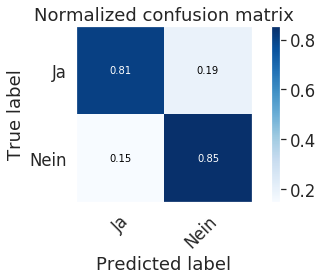

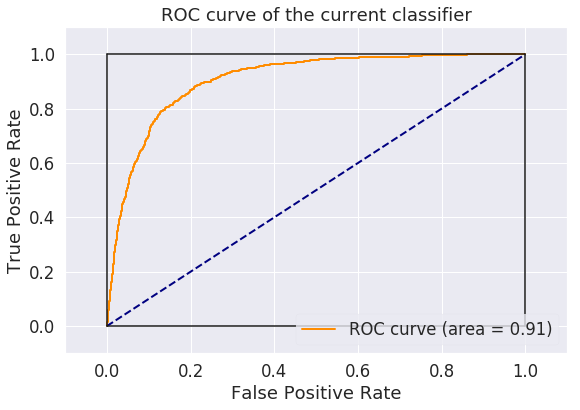

In [63]:
# First model (Logistic Regression) definition, training and evaluation 
# on previously selected features (myData)
# with default hyper parameters

[X_train, X_test, y_train, y_test] = myData(Data)

logreg = LogisticRegression(random_state=0, class_weight='balanced')

logreg, results.at[0, 'myColsDefault'] = train_and_evaluate(logreg, X_train, y_train, X_test, y_test)

plotROC(logreg, X_train, y_train, X_test, y_test)

In [64]:
# GridSearchCV for tuning hyper parameters of the first model (Logistic Regression)

[X_train, X_test, y_train, y_test] = myData(Data)

clf = LogisticRegression(class_weight= 'balanced', verbose=0, max_iter=1000)

param_grid = {
    'solver': ['lbfgs', 'newton-cg'], 
    'C' : [0.5, 1, 2, 10, 100, 1000, 10000],
    'tol' : [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')

Best params for recall_score
{'C': 100, 'solver': 'lbfgs', 'tol': 1e-06}


In [65]:
CVresults = pd.DataFrame(grid_search_clf.cv_results_)
CVresults = CVresults.sort_values(by='mean_test_recall_score', ascending=False)
CVresults[['mean_test_precision_score', 'mean_test_recall_score',
         'mean_test_accuracy_score', 'param_C',
         'param_tol', 'param_solver']].round(3).head()

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_C,param_tol,param_solver
40,0.41,0.80,0.84,100,0.00,lbfgs
41,0.41,0.80,0.84,100,0.00,lbfgs
42,0.41,0.80,0.84,100,0.00,lbfgs
43,0.41,0.80,0.84,100,0.00,lbfgs
44,0.41,0.80,0.84,100,0.01,lbfgs



               precision    recall  f1-score   support

          Ja       0.42      0.82      0.56       738
        Nein       0.97      0.85      0.91      5558

   micro avg       0.85      0.85      0.85      6296
   macro avg       0.70      0.84      0.73      6296
weighted avg       0.91      0.85      0.87      6296

Dimensions of training data: (25184, 47)
Recall: 82.38%


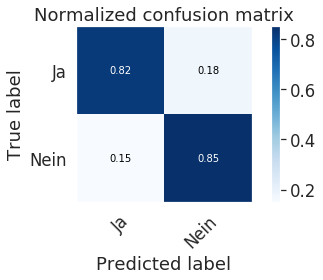

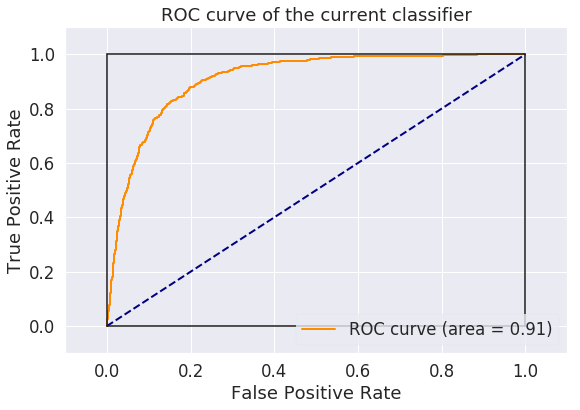

In [66]:
# First model (Logistic Regression) definition, training and evaluation 
# on the original data (orgData)
# with optimal hyper parameters

[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

logreg = LogisticRegression(random_state=0, class_weight='balanced', C=100, solver='lbfgs', tol=1e-06, max_iter=1000)

logreg, results.at[0, 'orgDataOptimal']  = train_and_evaluate(logreg, X_train, y_train, X_test, y_test)

plotROC(logreg, X_train, y_train, X_test, y_test)


               precision    recall  f1-score   support

          Ja       0.42      0.81      0.55       738
        Nein       0.97      0.85      0.91      5558

   micro avg       0.84      0.84      0.84      6296
   macro avg       0.69      0.83      0.73      6296
weighted avg       0.91      0.84      0.86      6296

Dimensions of training data: (25184, 21)
Recall: 81.44%


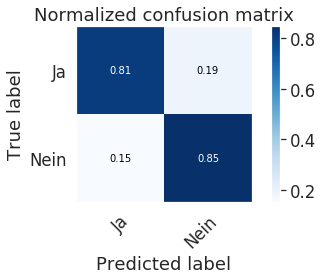

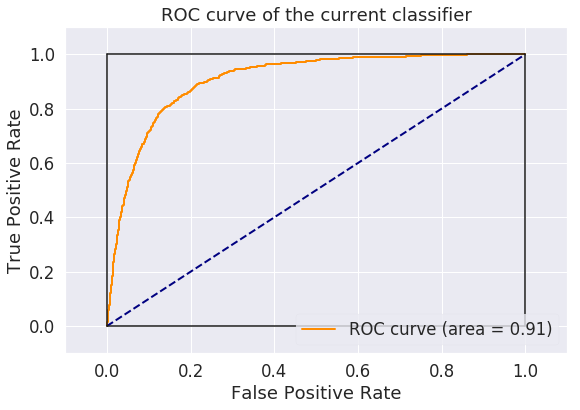

In [67]:
# First model (Logistic Regression) definition, training and evaluation 
# on previously selected features (myData)
# with optimal hyper parameters

[X_train, X_test, y_train, y_test] = myData(Data)

logreg = LogisticRegression(random_state=0, class_weight='balanced', C=100, solver='lbfgs', tol=1e-06, max_iter=1000)

logreg, results.at[0, 'myColsOptimal'] = train_and_evaluate(logreg, X_train, y_train, X_test, y_test)

plotROC(logreg, X_train, y_train, X_test, y_test)

Optimal number of features : 27

Feature Ranking:

Variable: Dauer                Importance: 1
Variable: Kontostand           Importance: 1
Variable: Haus                 Importance: 1
Variable: Kredit               Importance: 1
Variable: Anzahl der Ansprachen Importance: 1
Variable: Tage seit letzter Kampagne Importance: 1
Variable: Anzahl Kontakte letzte Kampagne Importance: 1
Variable: aug                  Importance: 1
Variable: dec                  Importance: 1
Variable: jan                  Importance: 1
Variable: jul                  Importance: 1
Variable: jun                  Importance: 1
Variable: mar                  Importance: 1
Variable: may                  Importance: 1
Variable: nov                  Importance: 1
Variable: oct                  Importance: 1
Variable: sep                  Importance: 1
Variable: Hausfrau             Importance: 1
Variable: Rentner              Importance: 1
Variable: Selbständig          Importance: 1
Variable: Student              

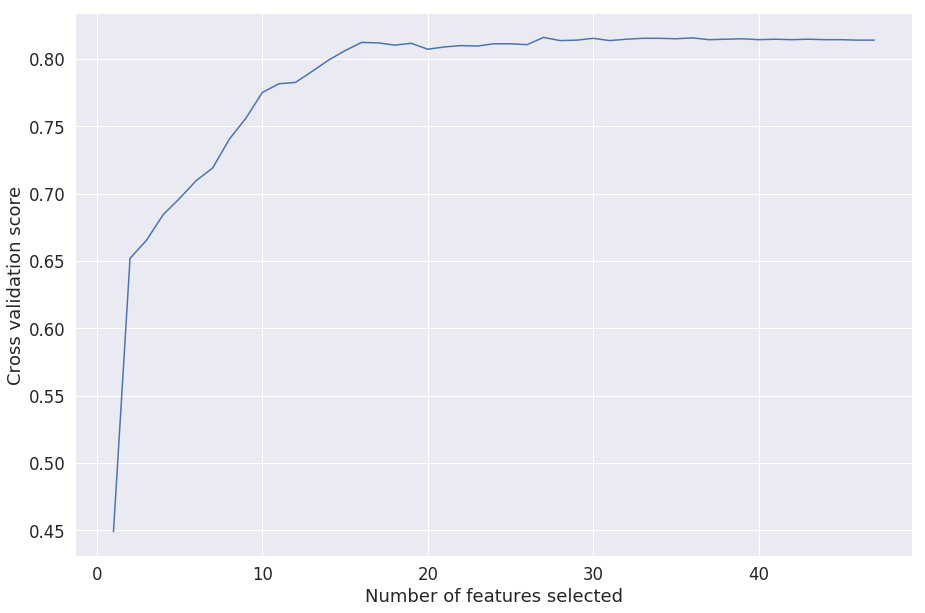

In [68]:
### Recursive feature elimination with cross-validation for the first model (Logistic regression)

[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

rfecv = RFECV(estimator=logreg, step=1, cv=StratifiedKFold(3), scoring='recall')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)
Qty = rfecv.n_features_

# Get numerical feature importances
importances = list(rfecv.ranking_)
# Saving feature names for later use
feature_list = list(dataCols)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = False)
# Print out the feature and importances 
print('\nFeature Ranking:\n')
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(15,10))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Here, the trend of scores becomes relatively flat from about 27 features. So, we can try with 27 features with highest ranking.

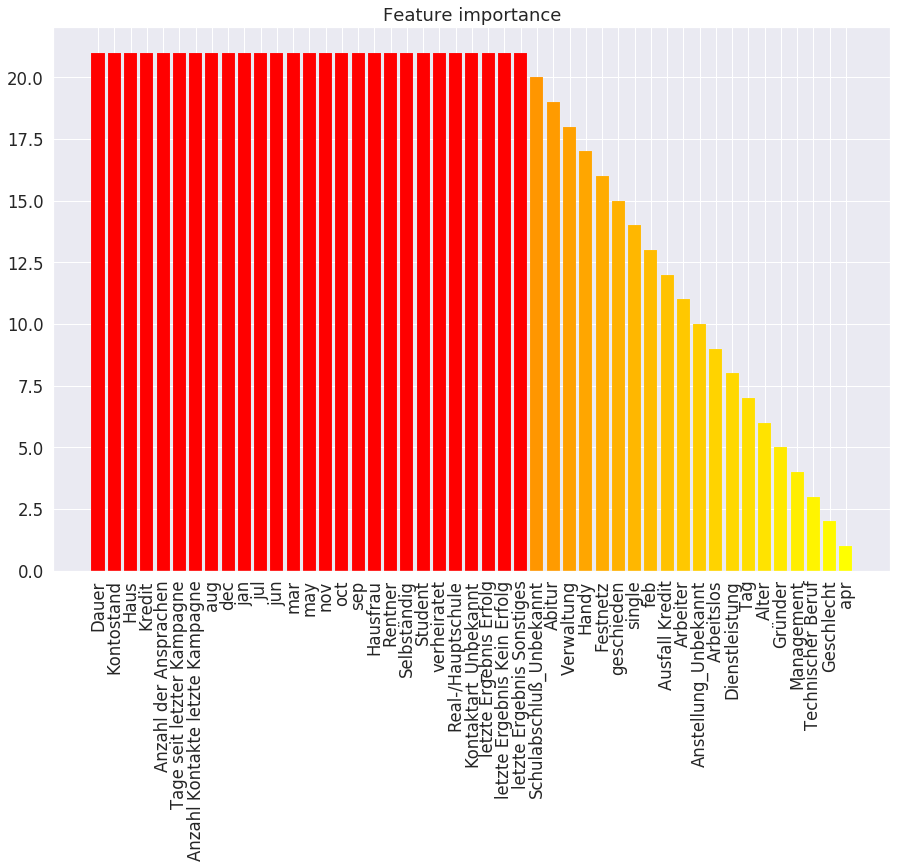

In [69]:
# Plotting feature importances based on RFE selection approach
MAX_score = feature_importances[-1:][0][1] + 1

import importlib

plot_data = {}

for i in feature_importances:
    plot_data[i[0]] = MAX_score - i[1] 
colors = ['red'] * (Qty)    
cmap = get_cmap(len(plot_data), name = 'autumn')
for i in range(Qty, len(plot_data)+1):
    colors.append(cmap(i))
plt.figure(figsize=(15,10))   
plt.bar(plot_data.keys(), plot_data.values(), color = colors)
plt.xticks(rotation=90)
plt.title('Feature importance')
plt.show()

In [70]:
# Determining indices of the features that should be dropped
removing_idx = []

idx = 0
for feature in feature_importances:
    if feature[1] > 1:
        removing_idx.append(idx)
    idx += 1   


               precision    recall  f1-score   support

          Ja       0.39      0.80      0.52       738
        Nein       0.97      0.83      0.89      5558

   micro avg       0.83      0.83      0.83      6296
   macro avg       0.68      0.82      0.71      6296
weighted avg       0.90      0.83      0.85      6296

Dimensions of training data: (25184, 27)
Recall: 80.08%


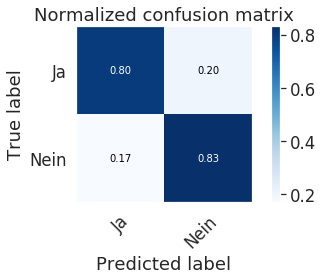

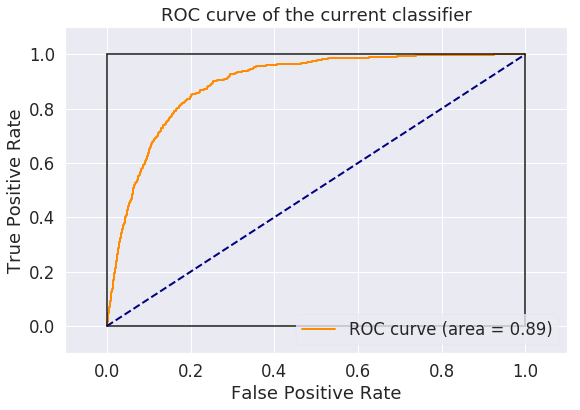

In [71]:
# First model (Logistic Regression) definition, training and evaluation 
# on the original data (orgData)
# with optimal hyper parameters
# using RFE feature selection 

X_train = np.delete(X_train,np.s_[removing_idx],axis=1)
X_test = np.delete(X_test,np.s_[removing_idx],axis=1)


logreg = LogisticRegression(random_state=0, class_weight='balanced', C=100, solver='lbfgs', tol=1e-06, max_iter=1000)

logreg, results.at[0, 'orgDataOptimalRFE'] = train_and_evaluate(logreg, X_train, y_train, X_test, y_test)

plotROC(logreg, X_train, y_train, X_test, y_test)

In [72]:
results

,model,orgDataDefault,myColsDefault,orgDataOptimal,myColsOptimal,orgDataOptimalRFE,smoteDataDefault,smoteDataOptimal,smoteDataOptimalRFE
0,Logistic Regression,81.30,80.76,82.38,81.44,80.08,,,
1,Random Forest,,,,,,,,
2,Support Vector Machine,,,,,,,,
3,Extra Trees,,,,,,,,
4,Gradient Boosting,,,,,,,,
5,Xgboost,,,,,,,,


### Model # 2: Random Forest


               precision    recall  f1-score   support

          Ja       0.65      0.27      0.38       738
        Nein       0.91      0.98      0.94      5558

   micro avg       0.90      0.90      0.90      6296
   macro avg       0.78      0.62      0.66      6296
weighted avg       0.88      0.90      0.88      6296

Dimensions of training data: (25184, 47)
Recall: 26.56%


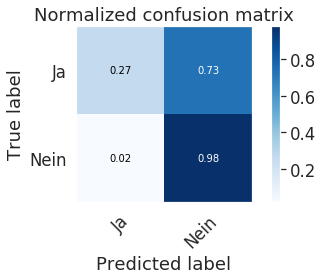

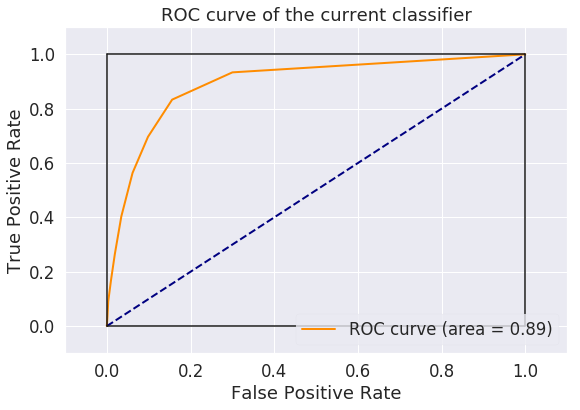

In [73]:
# Second model (Random Forest) definition, train and evaluation:
# on the original data (orgData)
# with default hyper parameters

[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

forest = RandomForestClassifier(random_state=0, class_weight='balanced')

forest, results.at[1, 'orgDataDefault'] = train_and_evaluate(forest, X_train, y_train, X_test, y_test)

plotROC(forest, X_train, y_train, X_test, y_test)


               precision    recall  f1-score   support

          Ja       0.63      0.38      0.47       738
        Nein       0.92      0.97      0.95      5558

   micro avg       0.90      0.90      0.90      6296
   macro avg       0.78      0.67      0.71      6296
weighted avg       0.89      0.90      0.89      6296

Dimensions of training data: (25184, 21)
Recall: 37.67%


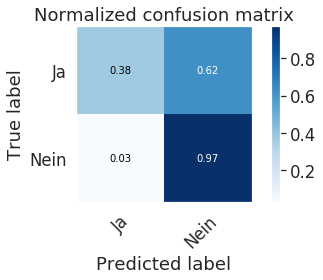

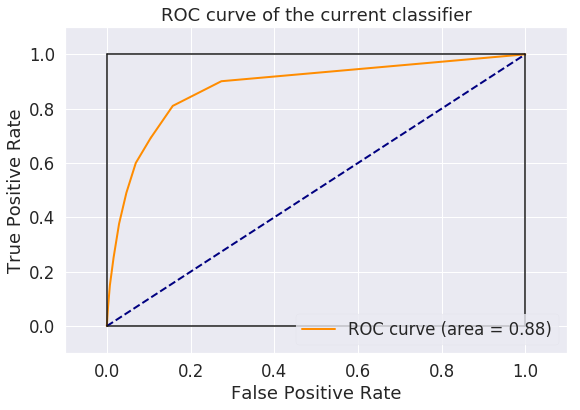

In [74]:
# Second model (Random Forest) definition, train and evaluation:
# on previously selected features (myData)
# with default hyper parameters

[X_train, X_test, y_train, y_test] = myData(Data)

forest = RandomForestClassifier(random_state=0, class_weight='balanced')

forest, results.at[1, 'myColsDefault'] = train_and_evaluate(forest, X_train, y_train, X_test, y_test)

plotROC(forest, X_train, y_train, X_test, y_test)

In [75]:
# GridSearchCV for tuning hyper parameters of the second model (Random Forest)

[X_train, X_test, y_train, y_test] = myData(Data)


stage = 5

if stage == 1:
    # In order to decide on boosting parameters, we need to set some 'initial values' of other parameters.
    # all of these values are just initial estimates and will be tuned later.
    
    # Here, we try to choose some initial values for parameters that do not decrease the recall score that we had
    # with the default values of the parameters
    clf = RandomForestClassifier(max_depth=10,random_state=0, class_weight='balanced')
    
    # Now, we check the optimum number of trees. 
    # For this purpose, we can do a grid search and test out values from 20 to 100 in steps of 20.
    param_grid = {
        'n_estimators' : range(60, 150, 20) # 80
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')
    
if stage == 2:
    # Tuning tree-specific parameters, The order of tuning variables should be decided carefully.
    # We should take the variables with a higher impact on outcome first.
    clf = RandomForestClassifier(n_estimators=80, random_state=0, class_weight='balanced')

    param_grid = {
        'max_depth' : range(2,15,2) # 6
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')
    
if stage == 3:
    # Tuning tree-specific parameters, The order of tuning variables should be decided carefully.
    # We should take the variables with a higher impact on outcome first.
    clf = RandomForestClassifier(n_estimators=80, max_depth=6, random_state=0, class_weight='balanced')

    param_grid = {
        'min_samples_split' : range(2,15,2) # 4
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')    
    
if stage == 4:
    # Tuning tree-specific parameters, The order of tuning variables should be decided carefully.
    # We should take the variables with a higher impact on outcome first.
    clf = RandomForestClassifier(n_estimators=80, max_depth=6,
                               random_state=0, class_weight='balanced', min_samples_split=4)

    param_grid = {
        'min_samples_leaf' : range(2,15,2) # 12
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')
    
if stage == 5:
    # Tuning tree-specific parameters, The order of tuning variables should be decided carefully.
    # We should take the variables with a higher impact on outcome first.
    clf = RandomForestClassifier(n_estimators=80, max_depth=6,random_state=0, 
                                class_weight='balanced', min_samples_split=4, min_samples_leaf=12)

    param_grid = {
        'max_features' : [3, 4, 5, 6, 7, 8] # 5 , here dafault value (sqrt) works well, no need to add the parameter explicitly
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')    

Best params for recall_score
{'max_features': 5}



               precision    recall  f1-score   support

          Ja       0.37      0.87      0.52       738
        Nein       0.98      0.81      0.88      5558

   micro avg       0.81      0.81      0.81      6296
   macro avg       0.68      0.84      0.70      6296
weighted avg       0.91      0.81      0.84      6296

Dimensions of training data: (25184, 47)
Recall: 87.26%


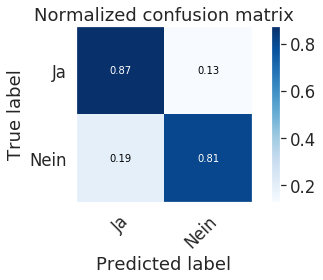

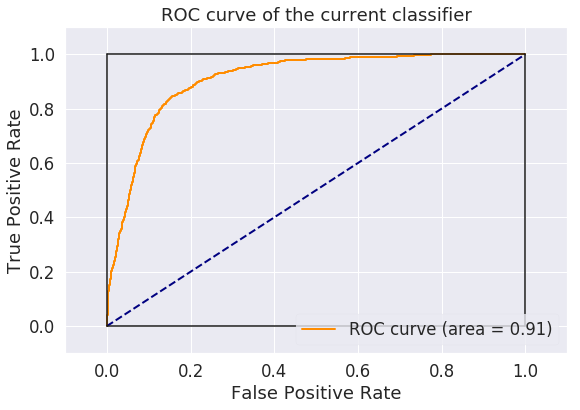

In [76]:
# Second model (Random Forest) definition, training and evaluation 
# on the original data (orgData)
# with optimal hyper parameters

[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

forest = RandomForestClassifier(n_estimators=80, max_depth=6,random_state=0, 
                                class_weight='balanced', min_samples_split=4, min_samples_leaf=12)

forest, results.at[1, 'orgDataOptimal'] = train_and_evaluate(forest, X_train, y_train, X_test, y_test)

plotROC(forest, X_train, y_train, X_test, y_test)


               precision    recall  f1-score   support

          Ja       0.38      0.87      0.53       738
        Nein       0.98      0.81      0.89      5558

   micro avg       0.82      0.82      0.82      6296
   macro avg       0.68      0.84      0.71      6296
weighted avg       0.91      0.82      0.84      6296

Dimensions of training data: (25184, 21)
Recall: 86.99%


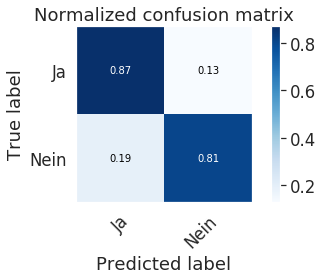

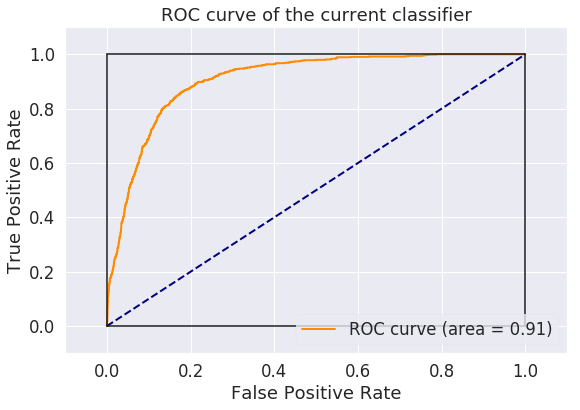

In [77]:
# Second model (Random Forest) definition, train and evaluation:
# on previously selected features (myData)
# with optimal hyper parameters

[X_train, X_test, y_train, y_test] = myData(Data)

forest = RandomForestClassifier(n_estimators=80, max_depth=6,random_state=0, 
                                class_weight='balanced', min_samples_split=4, min_samples_leaf=12)

forest, results.at[1, 'myColsOptimal'] = train_and_evaluate(forest, X_train, y_train, X_test, y_test)

plotROC(forest, X_train, y_train, X_test, y_test)

Optimal number of features : 36

Feature Ranking:

Variable: Tag                  Importance: 1
Variable: Dauer                Importance: 1
Variable: Alter                Importance: 1
Variable: Geschlecht           Importance: 1
Variable: Kontostand           Importance: 1
Variable: Haus                 Importance: 1
Variable: Kredit               Importance: 1
Variable: Anzahl der Ansprachen Importance: 1
Variable: Tage seit letzter Kampagne Importance: 1
Variable: Anzahl Kontakte letzte Kampagne Importance: 1
Variable: apr                  Importance: 1
Variable: aug                  Importance: 1
Variable: feb                  Importance: 1
Variable: jan                  Importance: 1
Variable: jul                  Importance: 1
Variable: jun                  Importance: 1
Variable: mar                  Importance: 1
Variable: may                  Importance: 1
Variable: nov                  Importance: 1
Variable: oct                  Importance: 1
Variable: sep                  

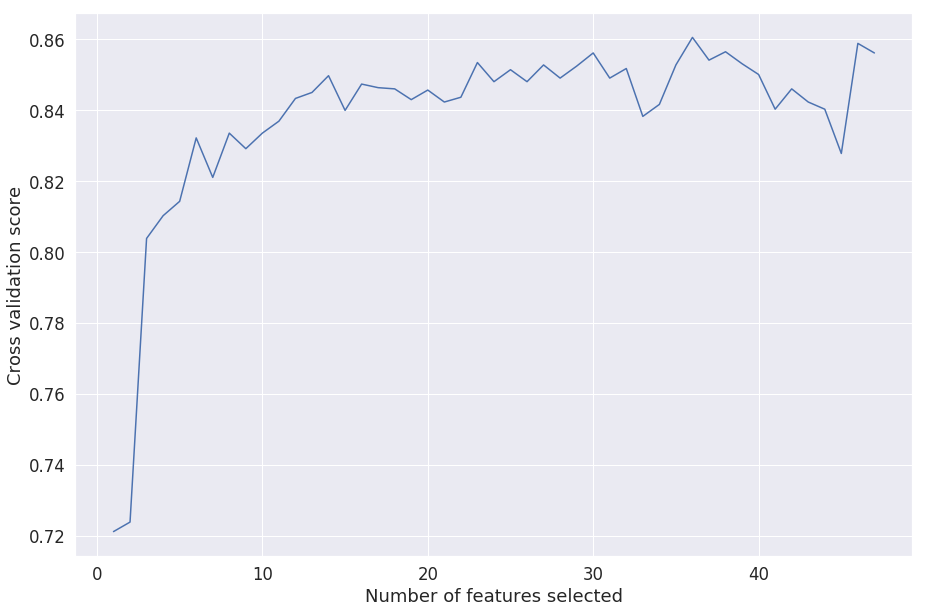

In [78]:
### Recursive feature elimination with cross-validation for the second model (Random Forest)

[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

forest = RandomForestClassifier(n_estimators=80, max_depth=6,random_state=0, 
                                class_weight='balanced', min_samples_split=4, min_samples_leaf=12)

rfecv = RFECV(estimator=forest, step=1, cv=StratifiedKFold(3), scoring='recall')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)
Qty = rfecv.n_features_

# Get numerical feature importances
importances = list(rfecv.ranking_)
# Saving feature names for later use
feature_list = list(dataCols)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = False)
# Print out the feature and importances 
print('\nFeature Ranking:\n')
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(15,10))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

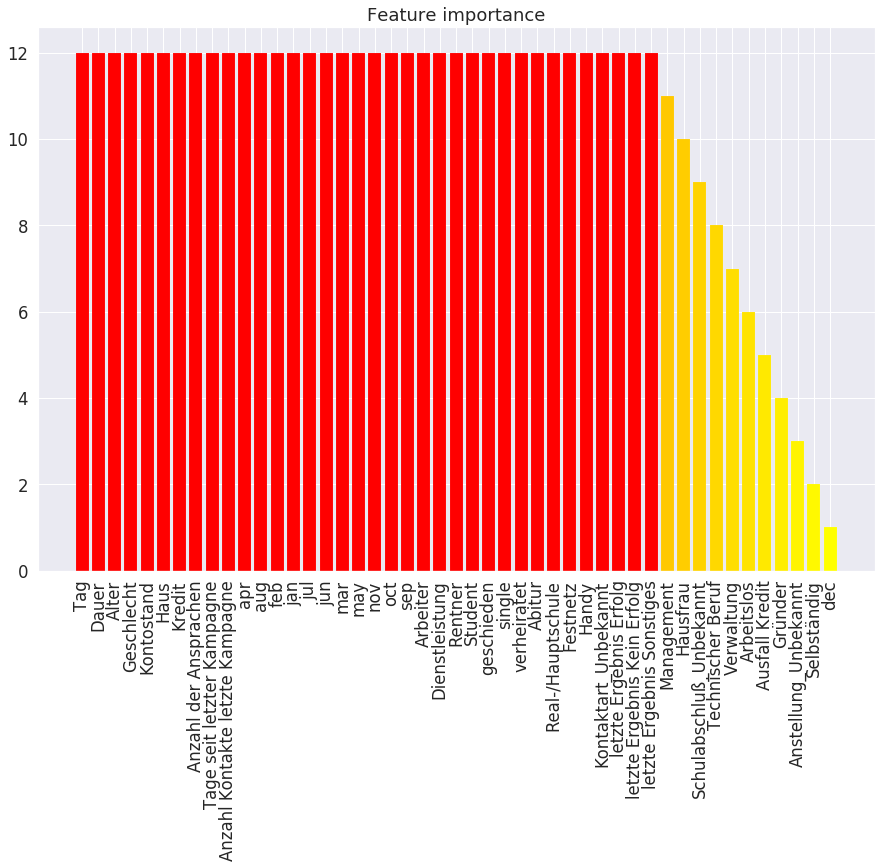

In [79]:
# Plotting feature importances based on RFE selection approach

MAX_score = feature_importances[-1:][0][1] + 1

import importlib

plot_data = {}

for i in feature_importances:
    plot_data[i[0]] = MAX_score - i[1] 
colors = ['red'] * (Qty)    
cmap = get_cmap(len(plot_data), name = 'autumn')
for i in range(Qty, len(plot_data)+1):
    colors.append(cmap(i))
plt.figure(figsize=(15,10))   
plt.bar(plot_data.keys(), plot_data.values(), color = colors)
plt.xticks(rotation=90)
plt.title('Feature importance')
plt.show()

In [80]:
# Determining indices of the features that should be dropped

removing_idx = []

idx = 0
for feature in feature_importances:
    if feature[1] > 1:
        removing_idx.append(idx)
    idx += 1   


               precision    recall  f1-score   support

          Ja       0.37      0.86      0.52       738
        Nein       0.98      0.81      0.88      5558

   micro avg       0.81      0.81      0.81      6296
   macro avg       0.67      0.83      0.70      6296
weighted avg       0.91      0.81      0.84      6296

Dimensions of training data: (25184, 36)
Recall: 86.04%


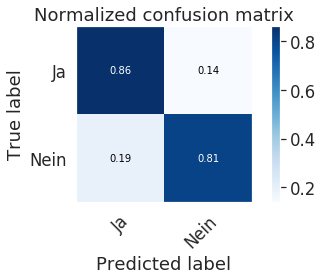

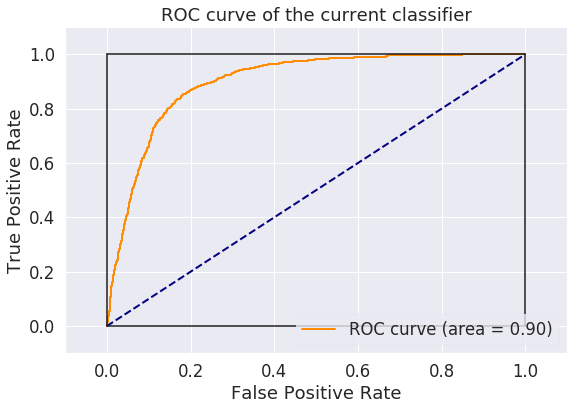

In [81]:
# Second model (Random Forest) definition, training and evaluation 
# on the original data (orgData)
# with optimal hyper parameters
# using RFE feature selection 

[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

X_train = np.delete(X_train,np.s_[removing_idx],axis=1)
X_test = np.delete(X_test,np.s_[removing_idx],axis=1)

forest = RandomForestClassifier(n_estimators=80, max_depth=6,random_state=0, 
                                class_weight='balanced', min_samples_split=4, min_samples_leaf=12)

forest, results.at[1, 'orgDataOptimalRFE'] = train_and_evaluate(forest, X_train, y_train, X_test, y_test)

plotROC(forest, X_train, y_train, X_test, y_test)

In [82]:
results

,model,orgDataDefault,myColsDefault,orgDataOptimal,myColsOptimal,orgDataOptimalRFE,smoteDataDefault,smoteDataOptimal,smoteDataOptimalRFE
0,Logistic Regression,81.30,80.76,82.38,81.44,80.08,,,
1,Random Forest,26.56,37.67,87.26,86.99,86.04,,,
2,Support Vector Machine,,,,,,,,
3,Extra Trees,,,,,,,,
4,Gradient Boosting,,,,,,,,
5,Xgboost,,,,,,,,


### Model # 3: SVM


               precision    recall  f1-score   support

          Ja       0.44      0.77      0.56       738
        Nein       0.97      0.87      0.91      5558

   micro avg       0.86      0.86      0.86      6296
   macro avg       0.70      0.82      0.74      6296
weighted avg       0.90      0.86      0.87      6296

Dimensions of training data: (25184, 47)
Recall: 76.83%


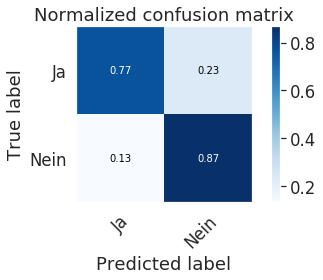

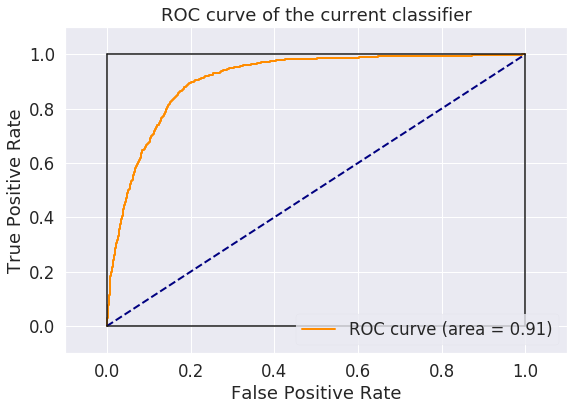

In [83]:
# Third model (SVM) definition, definition, training and evaluation 
# on the original data (orgData)
# with default hyper parameters

[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

from sklearn.svm import SVC

svc = SVC(random_state=0, class_weight='balanced')

svc, results.at[2, 'orgDataDefault'] = train_and_evaluate(svc, X_train, y_train, X_test, y_test)

plotROC(svc, X_train, y_train, X_test, y_test, typ=2)


               precision    recall  f1-score   support

          Ja       0.44      0.80      0.57       738
        Nein       0.97      0.87      0.92      5558

   micro avg       0.86      0.86      0.86      6296
   macro avg       0.71      0.83      0.74      6296
weighted avg       0.91      0.86      0.88      6296

Dimensions of training data: (25184, 21)
Recall: 79.54%


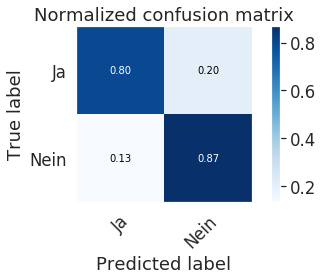

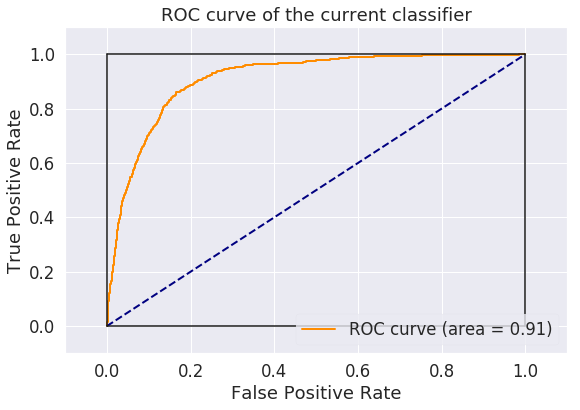

In [84]:
# Third model (SVM) definition, training and evaluation 
# on previously selected features (myData)
# with default hyper parameters

[X_train, X_test, y_train, y_test] = myData(Data)

from sklearn.svm import SVC

svc = SVC(random_state=0, class_weight='balanced')

svc, results.at[2, 'myColsDefault'] = train_and_evaluate(svc, X_train, y_train, X_test, y_test)

plotROC(svc, X_train, y_train, X_test, y_test, typ=2)

In [85]:
# GridSearchCV for tuning the parameters of the third model (SVC)
# on myCols

[X_train, X_test, y_train, y_test] = myData(Data)

from sklearn.svm import SVC

clf = SVC(kernel = 'linear', class_weight='balanced')

param_grid = {
    'C' : [0.5, 1],
    'gamma' : [0.1, 0.2, 0.5]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')

Best params for recall_score
{'C': 1, 'gamma': 0.1}


In [86]:
CVresults = pd.DataFrame(grid_search_clf.cv_results_)
CVresults = CVresults.sort_values(by='mean_test_recall_score', ascending=False)
CVresults[['mean_test_precision_score', 'mean_test_recall_score',
         'mean_test_accuracy_score', 'param_C',
         'param_gamma']].round(3).head(10)

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_C,param_gamma
3,0.41,0.80,0.84,1,0.10
4,0.41,0.80,0.84,1,0.20
5,0.41,0.80,0.84,1,0.50
0,0.41,0.79,0.84,0.50,0.10
1,0.41,0.79,0.84,0.50,0.20
2,0.41,0.79,0.84,0.50,0.50



               precision    recall  f1-score   support

          Ja       0.41      0.82      0.54       738
        Nein       0.97      0.84      0.90      5558

   micro avg       0.84      0.84      0.84      6296
   macro avg       0.69      0.83      0.72      6296
weighted avg       0.91      0.84      0.86      6296

Dimensions of training data: (25184, 47)
Recall: 82.25%


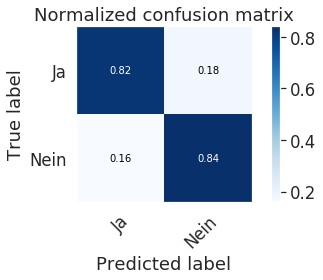

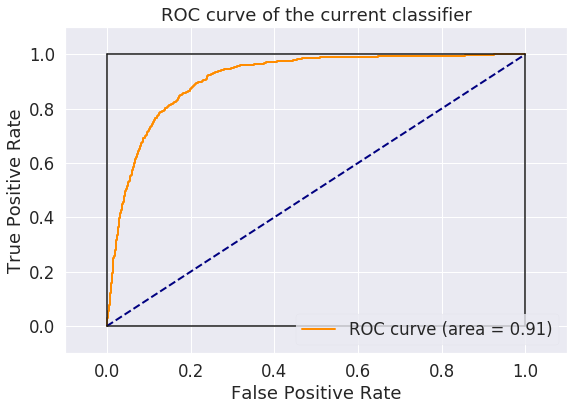

In [87]:
# Third model (SVM) definition, definition, training and evaluation 
# on the original data (orgData)
# with optimal hyper parameters

[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

from sklearn.svm import SVC

svc = SVC(kernel='linear', class_weight='balanced', C=1, random_state=0, gamma=0.1)

svc, results.at[2, 'orgDataOptimal'] = train_and_evaluate(svc, X_train, y_train, X_test, y_test)

plotROC(svc, X_train, y_train, X_test, y_test, typ=2)


               precision    recall  f1-score   support

          Ja       0.42      0.81      0.55       738
        Nein       0.97      0.85      0.91      5558

   micro avg       0.84      0.84      0.84      6296
   macro avg       0.69      0.83      0.73      6296
weighted avg       0.91      0.84      0.86      6296

Dimensions of training data: (25184, 21)
Recall: 80.76%


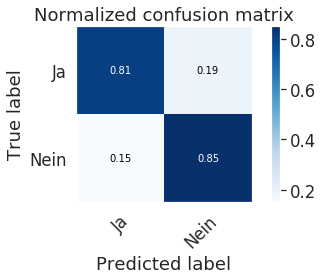

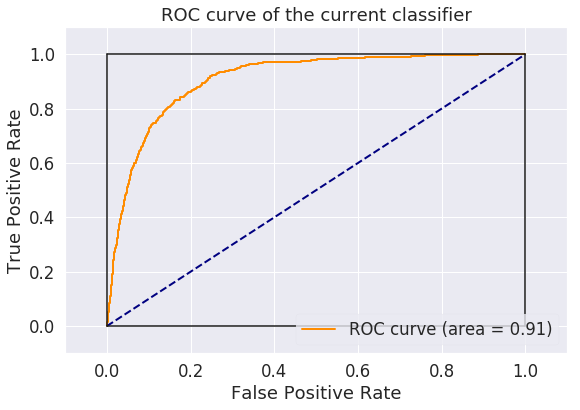

In [88]:
# Third model (SVM) definition, training and evaluation 
# on previously selected features (myData)
# with optimal hyper parameters

[X_train, X_test, y_train, y_test] = myData(Data)

from sklearn.svm import SVC

svc = SVC(kernel='linear', class_weight='balanced', C=1, random_state=0, gamma=0.1)

svc, results.at[2, 'myColsOptimal'] = train_and_evaluate(svc, X_train, y_train, X_test, y_test)

plotROC(svc, X_train, y_train, X_test, y_test, typ=2)


               precision    recall  f1-score   support

          Ja       0.38      0.81      0.51       738
        Nein       0.97      0.82      0.89      5558

   micro avg       0.82      0.82      0.82      6296
   macro avg       0.67      0.81      0.70      6296
weighted avg       0.90      0.82      0.85      6296

Dimensions of training data: (25184, 36)
Recall: 80.62%


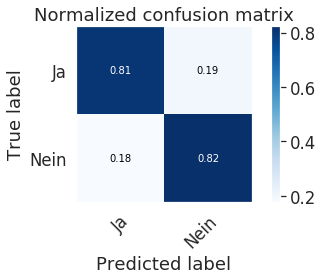

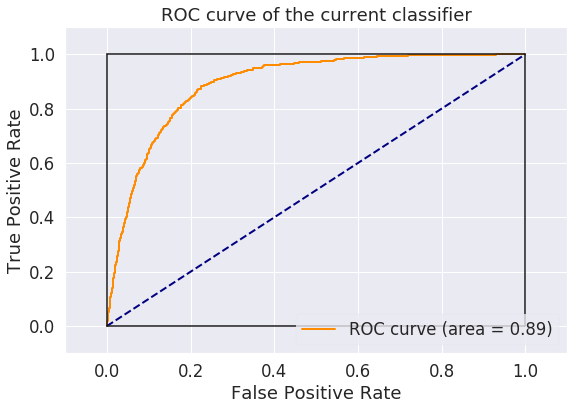

In [89]:
# Third model (SVM) definition, training and evaluation 
# on the original data (orgData)
# with optimal hyper parameters
# using RFE feature selection (on Random Forest) (Running RFE on SVM is too expensive)


[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

X_train = np.delete(X_train,np.s_[removing_idx],axis=1)
X_test = np.delete(X_test,np.s_[removing_idx],axis=1)


svc = SVC(kernel='linear', class_weight='balanced', C=1, random_state=0, gamma=0.1)

svc, results.at[2, 'orgDataOptimalRFE'] = train_and_evaluate(svc, X_train, y_train, X_test, y_test)

plotROC(svc, X_train, y_train, X_test, y_test, typ=2)

In [90]:
results

,model,orgDataDefault,myColsDefault,orgDataOptimal,myColsOptimal,orgDataOptimalRFE,smoteDataDefault,smoteDataOptimal,smoteDataOptimalRFE
0,Logistic Regression,81.30,80.76,82.38,81.44,80.08,,,
1,Random Forest,26.56,37.67,87.26,86.99,86.04,,,
2,Support Vector Machine,76.83,79.54,82.25,80.76,80.62,,,
3,Extra Trees,,,,,,,,
4,Gradient Boosting,,,,,,,,
5,Xgboost,,,,,,,,


### Model # 4: Extra Trees


               precision    recall  f1-score   support

          Ja       0.63      0.29      0.40       738
        Nein       0.91      0.98      0.94      5558

   micro avg       0.90      0.90      0.90      6296
   macro avg       0.77      0.63      0.67      6296
weighted avg       0.88      0.90      0.88      6296

Dimensions of training data: (25184, 47)
Recall: 28.86%


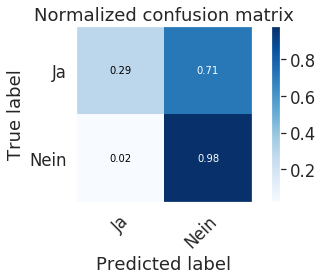

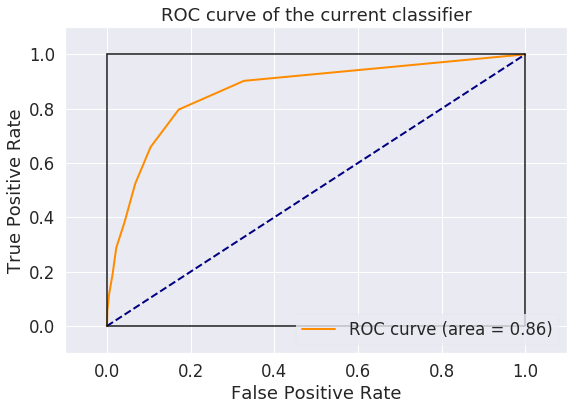

In [91]:
# Fourth model (Extra Trees Classifier) definition, definition, training and evaluation 
# on the original data (orgData)
# with default hyper parameters

from sklearn.ensemble import ExtraTreesClassifier as ETC

[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

xTrees = ETC(random_state=0, class_weight = 'balanced')

xTrees, results.at[3, 'orgDataDefault'] = train_and_evaluate(xTrees, X_train, y_train, X_test, y_test)

plotROC(xTrees, X_train, y_train, X_test, y_test)


               precision    recall  f1-score   support

          Ja       0.58      0.40      0.47       738
        Nein       0.92      0.96      0.94      5558

   micro avg       0.90      0.90      0.90      6296
   macro avg       0.75      0.68      0.71      6296
weighted avg       0.88      0.90      0.89      6296

Dimensions of training data: (25184, 21)
Recall: 39.57%


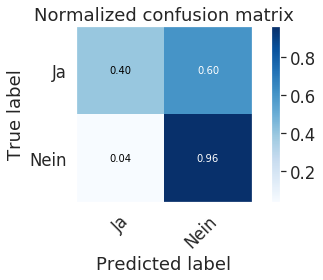

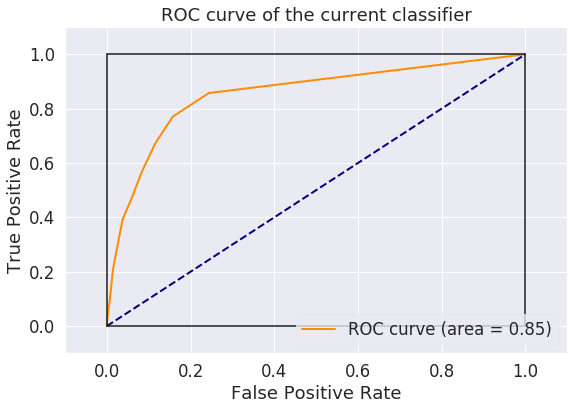

In [92]:
# Fourth model (Extra Trees Classifier) definition, training and evaluation 
# on previously selected features (myData)
# with default hyper parameters

[X_train, X_test, y_train, y_test] = myData(Data)

xTrees = ETC(random_state=0, class_weight = 'balanced')

xTrees, results.at[3, 'myColsDefault'] = train_and_evaluate(xTrees, X_train, y_train, X_test, y_test)

plotROC(xTrees, X_train, y_train, X_test, y_test)

In [93]:
# GridSearchCV for tuning the parameters of the fourth model (Extra Trees Classifier)
# on myCols

[X_train, X_test, y_train, y_test] = myData(Data)

from sklearn.ensemble import ExtraTreesClassifier as ETC

clf = ETC(class_weight = 'balanced')

param_grid = {
    'n_estimators' : [50, 100, 200],
    'max_depth' : [5, 10, 15, 20],
    'min_samples_split': [5, 10, 20], 
    'max_features': ['auto', 'sqrt', 'log2']
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')

Best params for recall_score
{'max_depth': 20, 'max_features': 'auto', 'min_samples_split': 20, 'n_estimators': 50}


In [94]:
CVresults = pd.DataFrame(grid_search_clf.cv_results_)
CVresults = CVresults.sort_values(by='mean_test_recall_score', ascending=False)
CVresults[['mean_test_precision_score', 'mean_test_recall_score',
         'mean_test_accuracy_score', 'param_n_estimators',
         'param_max_depth', 'param_min_samples_split', 'param_max_features']].round(3).head(10)

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_n_estimators,param_max_depth,param_min_samples_split,param_max_features
87,0.42,0.80,0.85,50,20,20,auto
89,0.42,0.80,0.85,200,20,20,auto
97,0.42,0.80,0.85,100,20,20,sqrt
79,0.41,0.80,0.84,100,15,20,log2
96,0.42,0.80,0.85,50,20,20,sqrt
107,0.42,0.80,0.85,200,20,20,log2
88,0.42,0.80,0.85,100,20,20,auto
106,0.43,0.80,0.85,100,20,20,log2
61,0.41,0.80,0.84,100,15,20,auto
98,0.42,0.80,0.85,200,20,20,sqrt



               precision    recall  f1-score   support

          Ja       0.46      0.75      0.57       738
        Nein       0.96      0.88      0.92      5558

   micro avg       0.87      0.87      0.87      6296
   macro avg       0.71      0.81      0.74      6296
weighted avg       0.90      0.87      0.88      6296

Dimensions of training data: (25184, 47)
Recall: 74.80%


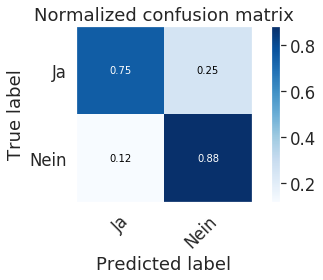

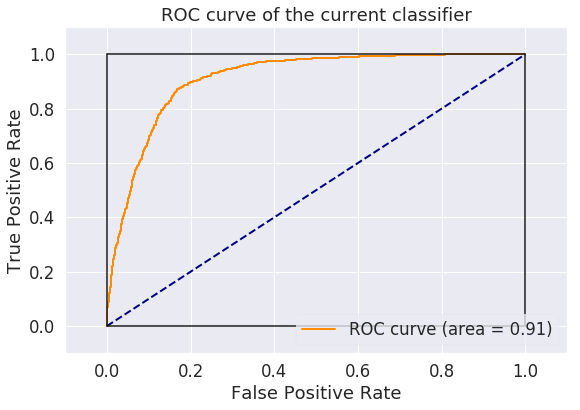

In [95]:
# Fourth model (Extra Trees Classifier) definition, definition, training and evaluation 
# on the original data (orgData)
# with optimal hyper parameters

from sklearn.ensemble import ExtraTreesClassifier as ETC

[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

xTrees = ETC(n_estimators=200, max_depth=20, max_features='log2', min_samples_split= 20,
                               random_state=0, class_weight = 'balanced')

xTrees, results.at[3, 'orgDataOptimal'] = train_and_evaluate(xTrees, X_train, y_train, X_test, y_test)

plotROC(xTrees, X_train, y_train, X_test, y_test)


               precision    recall  f1-score   support

          Ja       0.44      0.82      0.57       738
        Nein       0.97      0.86      0.91      5558

   micro avg       0.86      0.86      0.86      6296
   macro avg       0.71      0.84      0.74      6296
weighted avg       0.91      0.86      0.87      6296

Dimensions of training data: (25184, 21)
Recall: 82.11%


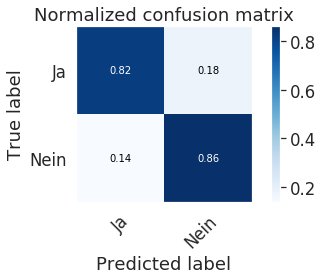

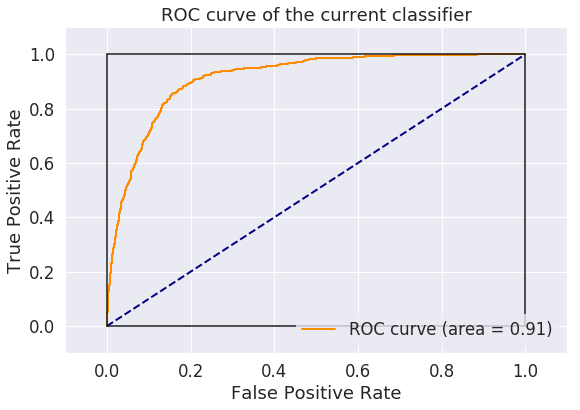

In [96]:
# Fourth model (Extra Trees Classifier) definition, training and evaluation 
# on previously selected features (myData)
# with optimal hyper parameters

[X_train, X_test, y_train, y_test] = myData(Data)

xTrees = ETC(n_estimators=200, max_depth=20, max_features='log2', min_samples_split= 20,
                               random_state=0, class_weight = 'balanced')

xTrees, results.at[3, 'myColsOptimal'] = train_and_evaluate(xTrees, X_train, y_train, X_test, y_test)

plotROC(xTrees, X_train, y_train, X_test, y_test)


               precision    recall  f1-score   support

          Ja       0.45      0.77      0.57       738
        Nein       0.97      0.88      0.92      5558

   micro avg       0.86      0.86      0.86      6296
   macro avg       0.71      0.82      0.74      6296
weighted avg       0.91      0.86      0.88      6296

Dimensions of training data: (25184, 36)
Recall: 76.83%


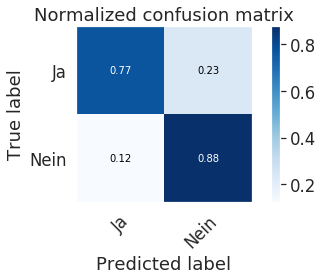

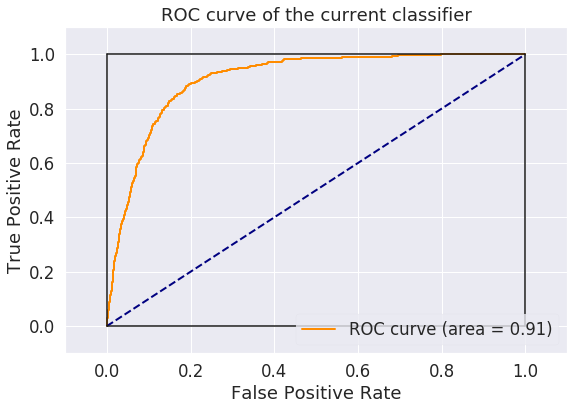

In [97]:
# Fourth model (Extra Trees Classifier) definition, definition, training and evaluation 
# on the original data (orgData)
# with optimal hyper parameters
# using RFE feature selection (on Random Forest) (Running RFE on ETC is too expensive)

[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

X_train = np.delete(X_train,np.s_[removing_idx],axis=1)
X_test = np.delete(X_test,np.s_[removing_idx],axis=1)

xTrees = ETC(n_estimators=200, max_depth=20, max_features='log2', min_samples_split= 20,
                               random_state=0, class_weight = 'balanced')

xTrees, results.at[3, 'orgDataOptimalRFE'] = train_and_evaluate(xTrees, X_train, y_train, X_test, y_test)

plotROC(xTrees, X_train, y_train, X_test, y_test)

In [98]:
results

,model,orgDataDefault,myColsDefault,orgDataOptimal,myColsOptimal,orgDataOptimalRFE,smoteDataDefault,smoteDataOptimal,smoteDataOptimalRFE
0,Logistic Regression,81.30,80.76,82.38,81.44,80.08,,,
1,Random Forest,26.56,37.67,87.26,86.99,86.04,,,
2,Support Vector Machine,76.83,79.54,82.25,80.76,80.62,,,
3,Extra Trees,28.86,39.57,74.80,82.11,76.83,,,
4,Gradient Boosting,,,,,,,,
5,Xgboost,,,,,,,,


### Model # 5: Gradient Boosting

Gradient Boosting is a sequential process and thus every time it makes an incorrect prediction, it focuses more on that incorrectly predicted data point. So, if the first iteration gave you an accuracy of 80 %, the second iteration would focus on the remaining 20%.

Since Garient Boosting Classifier has no **class_weight** parameter to be able to handle **class imbalance problem**, we use our balanced data (smoteData) on it:


               precision    recall  f1-score   support

          Ja       0.50      0.74      0.59       738
        Nein       0.96      0.90      0.93      5558

   micro avg       0.88      0.88      0.88      6296
   macro avg       0.73      0.82      0.76      6296
weighted avg       0.91      0.88      0.89      6296

Dimensions of training data: (44444, 47)
Recall: 73.58%


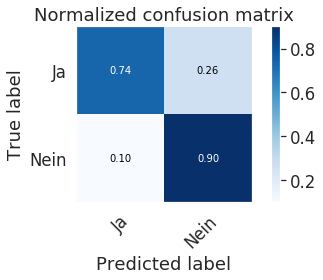

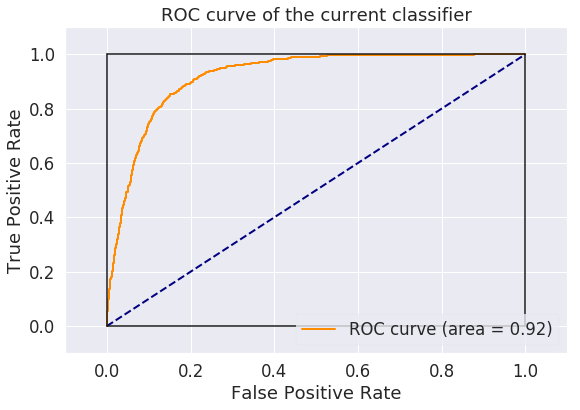

In [99]:
# Fifth model (Gradient Boosting Classifier) definition, definition, training and evaluation 
# on the balanced Data (smoteData)
# with default hyper parameters

from sklearn.ensemble import GradientBoostingClassifier as GBC

[X_train, X_test, y_train, y_test] = smoteData(Data)

gBoosting = GBC(random_state=0)

gBoosting,  results.at[4, 'smoteDataDefault'] = train_and_evaluate(gBoosting, X_train, y_train, X_test, y_test)

plotROC(gBoosting, X_train, y_train, X_test, y_test)

In [100]:
# GridSearchCV for tuning the parameters of the fifth model (Gradient Boosting Classifier)
# on smoteData

[X_train, X_test, y_train, y_test] = smoteData(Data)

from sklearn.ensemble import GradientBoostingClassifier as GBC

stage = 4

if stage == 1:
    # In order to decide on boosting parameters, we need to set some 'initial values' of other parameters.
    # all of these values are just initial estimates and will be tuned later.
    # min_samples_split => 0.5~1% of total samples
    # min_sample_leaf = 50 => selected based on intuition
    # max_depth = 5 => Should be chosen (5-8) based on the number of samples and features
    # max_featres = 'sqrt'
    # subsample = 0.8 => commonly used start value
    # random_state = 10 => shoulb be always the same for keeping he results comparible in different executions
    # learning_rate = 0.1 => default value
    
    # Here, we try to choose some initial values for parameters that do not decrease the recall score that we had
    # with the default values of the parameters
    clf = GBC(min_samples_split=200, min_samples_leaf=20, max_depth=5, max_features='sqrt',  
                subsample=0.8, random_state=10, learning_rate=0.1)
    
    # Now, we check the optimum number of trees. 
    # For this purpose, we can do a grid search and test out values from 20 to 100 in steps of 10.
    param_grid = {
        'n_estimators' : range(20,201,10) # 150
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score, greater_is_better=False),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')
    
if stage == 2:
    # Tuning tree-specific parameters, The order of tuning variables should be decided carefully.
    # We should take the variables with a higher impact on outcome first.
    clf = GBC(learning_rate=0.1, n_estimators=90, max_features='sqrt', subsample=0.8, random_state=10)

    param_grid = {
        'max_depth' : range(5,16,5), # 5
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score, greater_is_better=False),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')
    
if stage == 3: 
    clf = GBC(max_depth=5, learning_rate=0.1, n_estimators=90,
              max_features='sqrt', subsample=0.8, random_state=10)

    param_grid = {
        'min_samples_split' : range(200,1001,200), #300
        'min_samples_leaf' : range(30,71,10) # 50
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score, greater_is_better=False),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score') 
       
if stage == 4: 
    clf = GBC(max_features='sqrt', min_samples_leaf= 50, min_samples_split=400, max_depth=5, learning_rate=0.1, n_estimators=90
              , random_state=10)

    param_grid = {
        'subsample' : [0.6,0.7,0.75,0.8,0.85,0.9] # 0.75
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score, greater_is_better=False),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score') 
    

Best params for recall_score
{'subsample': 0.75}


In [101]:
CVresults = pd.DataFrame(grid_search_clf.cv_results_)
CVresults = CVresults.sort_values(by='mean_test_recall_score', ascending=False)
CVresults[['mean_test_precision_score', 'mean_test_recall_score',
         'mean_test_accuracy_score', 'param_subsample']].round(3)

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_subsample
2,0.90,-0.93,0.91,0.75
3,0.90,-0.93,0.91,0.80
0,0.90,-0.93,0.91,0.60
4,0.90,-0.93,0.91,0.85
1,0.90,-0.93,0.91,0.70
5,0.90,-0.93,0.91,0.90



               precision    recall  f1-score   support

          Ja       0.42      0.84      0.56       738
        Nein       0.97      0.85      0.91      5558

   micro avg       0.84      0.84      0.84      6296
   macro avg       0.70      0.84      0.73      6296
weighted avg       0.91      0.84      0.87      6296

Dimensions of training data: (44444, 47)
Recall: 83.60%


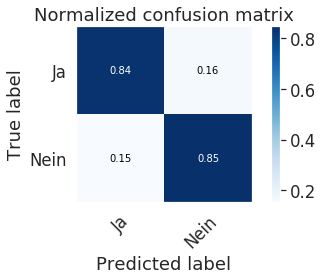

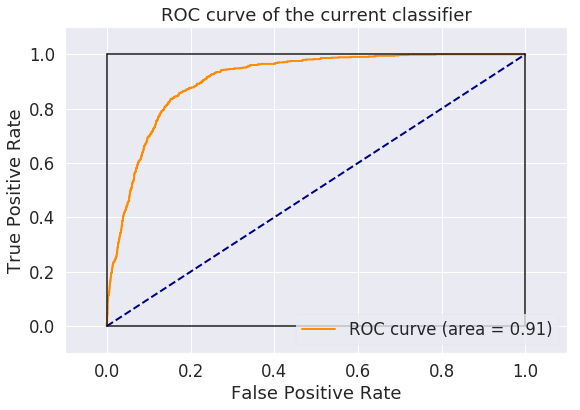

In [102]:
# Fifth model (Gradient Boosting Classifier) definition, definition, training and evaluation 
# on the balanced Data (smoteData)
# with optimal hyper parameters

[X_train, X_test, y_train, y_test] = smoteData(Data)

gBoosting = GBC(max_features='sqrt', min_samples_leaf= 50, min_samples_split=300, max_depth=5, learning_rate=0.01
                , n_estimators=150, subsample=0.75, random_state=10)

gBoosting,  results.at[4, 'smoteDataOptimal'] = train_and_evaluate(gBoosting, X_train, y_train, X_test, y_test)

plotROC(gBoosting, X_train, y_train, X_test, y_test)


               precision    recall  f1-score   support

          Ja       0.42      0.80      0.55       738
        Nein       0.97      0.85      0.91      5558

   micro avg       0.85      0.85      0.85      6296
   macro avg       0.70      0.83      0.73      6296
weighted avg       0.91      0.85      0.87      6296

Dimensions of training data: (44444, 36)
Recall: 79.95%


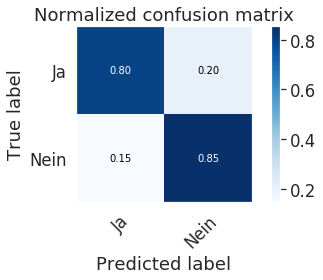

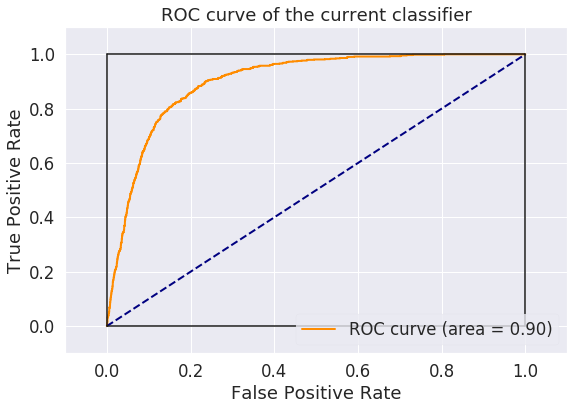

In [103]:
# Fifth model (Gradient Boosting Classifier) definition, training and evaluation 
# on the balanced Data (smoteData)
# with optimal hyper parameters
# using RFE feature selection (on Random Forest) (Running RFE on Gradient Boosting Classifier is too expensive)

[X_train, X_test, y_train, y_test] = smoteData(Data)

X_train = np.delete(X_train,np.s_[removing_idx],axis=1)
X_test = np.delete(X_test,np.s_[removing_idx],axis=1)

gBoosting = GBC(max_features='sqrt', min_samples_leaf= 50, min_samples_split=300, max_depth=5, learning_rate=0.01
                , n_estimators=150, subsample=0.75, random_state=10)

gBoosting,  results.at[4, 'smoteDataOptimalRFE'] = train_and_evaluate(gBoosting, X_train, y_train, X_test, y_test)

plotROC(gBoosting, X_train, y_train, X_test, y_test)

In [104]:
results

,model,orgDataDefault,myColsDefault,orgDataOptimal,myColsOptimal,orgDataOptimalRFE,smoteDataDefault,smoteDataOptimal,smoteDataOptimalRFE
0,Logistic Regression,81.30,80.76,82.38,81.44,80.08,,,
1,Random Forest,26.56,37.67,87.26,86.99,86.04,,,
2,Support Vector Machine,76.83,79.54,82.25,80.76,80.62,,,
3,Extra Trees,28.86,39.57,74.80,82.11,76.83,,,
4,Gradient Boosting,,,,,,73.58,83.60,79.95
5,Xgboost,,,,,,,,


### Model # 6: XGBoost

Since XGBoost Classifier has no **class_weight** parameter to be able to handle **class imbalance problem**, we use our balanced data (smoteData) on it:


               precision    recall  f1-score   support

          Ja       0.49      0.75      0.59       738
        Nein       0.96      0.90      0.93      5558

   micro avg       0.88      0.88      0.88      6296
   macro avg       0.73      0.82      0.76      6296
weighted avg       0.91      0.88      0.89      6296

Dimensions of training data: (44444, 47)
Recall: 75.07%


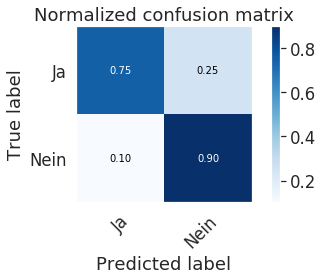

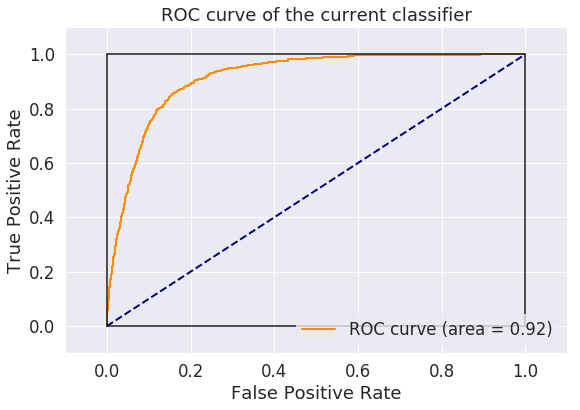

In [105]:
# Sixth model (Xgboost) definition, definition, training and evaluation 
# on the balanced Data (smoteData)
# with default hyper parameters

from xgboost import XGBClassifier

[X_train, X_test, y_train, y_test] = smoteData(Data)

xgb = XGBClassifier(random_state=0)

xgb,  results.at[5, 'smoteDataDefault'] = train_and_evaluate(xgb, X_train, y_train, X_test, y_test)

plotROC(xgb, X_train, y_train, X_test, y_test)

In [106]:
# GridSearchCV for tuning the parameters of the sixth model (XGBoost Classifier)
# on the balanced Data (smoteData)

[X_train, X_test, y_train, y_test] = smoteData(Data)

from xgboost import XGBClassifier

stage = 6

if stage == 1:
    # In order to decide on boosting parameters, we need to set some 'initial values' of other parameters.
    # all of these values are just initial estimates and will be tuned later.
    
    # Here, we try to choose some initial values for parameters that do not decrease the recall score that we had
    # with the default values of the parameters
    clf = XGBClassifier(objective= 'binary:logistic', random_state=0)
    
    # Now, we check the optimum number of trees. 
    # For this purpose, we can do a grid search and test out values from 20 to 100 in steps of 20.
    param_grid = {
        'n_estimators' : range(10, 101, 20) # 90
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')
    
if stage == 2:
    # Tuning tree-specific parameters, The order of tuning variables should be decided carefully.
    # We should take the variables with a higher impact on outcome first.
    clf = XGBClassifier(objective= 'binary:logistic', n_estimators=90)

    param_grid = {
        'max_depth' : range(2,10,1) # 2
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score, greater_is_better=False),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')
    
if stage == 3: 
    clf = XGBClassifier(objective= 'binary:logistic',  n_estimators=90, max_depth=2)

    param_grid = {
        'min_child_weight':range(1,10,1) # No difference (default value works well, do not add this parameter)
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score, greater_is_better=False),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score') 
       
if stage == 4: 
    clf = XGBClassifier(objective= 'binary:logistic',  n_estimators=90, max_depth=2)

    param_grid = {
        'gamma':[i/10.0 for i in range(0,5)] # No difference (default value works well, do not add this parameter)
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score') 
 
if stage == 5: 
    clf = XGBClassifier(objective= 'binary:logistic',  n_estimators=90, max_depth=2)

    param_grid = {
        #'subsample':[i/10.0 for i in range(6,10)], # No difference (default value works well, do not add this parameter)
        'colsample_bytree':[i/10.0 for i in range(6,10)] # 0.6
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score, greater_is_better=False),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')
    
if stage == 6: 
    clf = XGBClassifier(objective= 'binary:logistic',  n_estimators=90, max_depth=2, colsample_bytree=0.6)

    param_grid = {
        'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05] # 0.05
    }

    scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score),
        'accuracy_score': make_scorer(accuracy_score)
    }

    grid_search_clf = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, param_grid, scorers, 'recall_score')  

Best params for recall_score
{'reg_alpha': 0.05}


In [107]:
CVresults = pd.DataFrame(grid_search_clf.cv_results_)
CVresults = CVresults.sort_values(by='mean_test_recall_score', ascending=False)
CVresults[['mean_test_precision_score', 'mean_test_recall_score',
         'mean_test_accuracy_score', 'param_reg_alpha']].round(3)

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_reg_alpha
4,0.89,0.91,0.90,0.05
0,0.88,0.91,0.89,0
1,0.88,0.91,0.89,0.00
2,0.88,0.91,0.89,0.01
3,0.88,0.91,0.89,0.01



               precision    recall  f1-score   support

          Ja       0.31      0.83      0.46       738
        Nein       0.97      0.76      0.85      5558

   micro avg       0.77      0.77      0.77      6296
   macro avg       0.64      0.80      0.65      6296
weighted avg       0.89      0.77      0.80      6296

Dimensions of training data: (44444, 47)
Recall: 83.47%


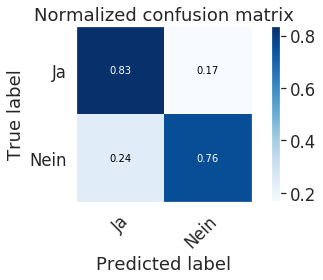

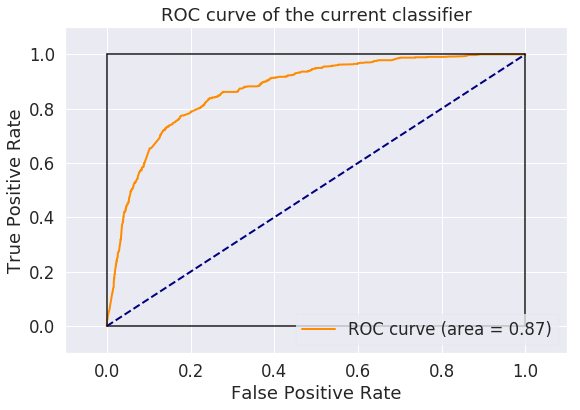

In [108]:
# Sixth model (Xgboost) definition, training and evaluation 
# on the balanced Data (smoteData)
# with optimal hyper parameters
# increasing reg_alpha from 0.05 to 2 without recall loss to force classifier to do more feature selection

from xgboost import XGBClassifier

[X_train, X_test, y_train, y_test] = smoteData(Data)

xgb = XGBClassifier(objective= 'binary:logistic',  n_estimators=90, max_depth=2, colsample_bytree=0.6, reg_alpha=2
                   , learning_rate=0.011)

xgb,  results.at[5, 'smoteDataOptimal'] = train_and_evaluate(xgb, X_train, y_train, X_test, y_test)

plotROC(xgb, X_train, y_train, X_test, y_test)


               precision    recall  f1-score   support

          Ja       0.32      0.80      0.46       738
        Nein       0.97      0.77      0.86      5558

   micro avg       0.78      0.78      0.78      6296
   macro avg       0.64      0.79      0.66      6296
weighted avg       0.89      0.78      0.81      6296

Dimensions of training data: (44444, 36)
Recall: 80.08%


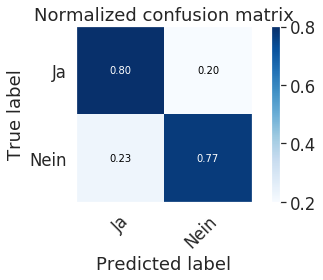

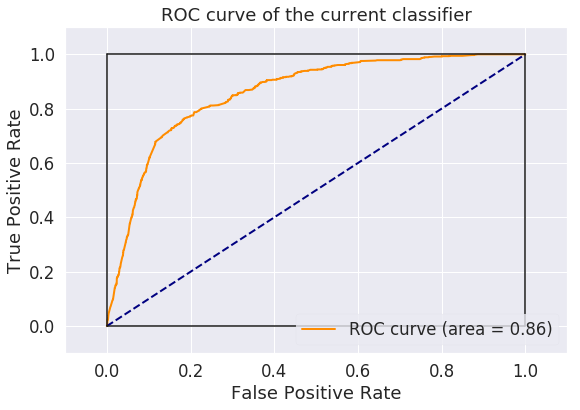

In [109]:
# Sixth model (Xgboost) definition, training and evaluation 
# on the balanced Data (smoteData)
# with optimal hyper parameters
# using RFE feature selection (on Random Forest) (Running RFE on Xgboost classifier is too expensive)

[X_train, X_test, y_train, y_test] = smoteData(Data)

X_train = np.delete(X_train,np.s_[removing_idx],axis=1)
X_test = np.delete(X_test,np.s_[removing_idx],axis=1)

xgb = XGBClassifier(objective= 'binary:logistic',  n_estimators=90, max_depth=2, colsample_bytree=0.6, reg_alpha=2
                   , learning_rate=0.011)

gBoosting,  results.at[5, 'smoteDataOptimalRFE'] = train_and_evaluate(xgb, X_train, y_train, X_test, y_test)

plotROC(xgb, X_train, y_train, X_test, y_test)

In [110]:
results

,model,orgDataDefault,myColsDefault,orgDataOptimal,myColsOptimal,orgDataOptimalRFE,smoteDataDefault,smoteDataOptimal,smoteDataOptimalRFE
0,Logistic Regression,81.30,80.76,82.38,81.44,80.08,,,
1,Random Forest,26.56,37.67,87.26,86.99,86.04,,,
2,Support Vector Machine,76.83,79.54,82.25,80.76,80.62,,,
3,Extra Trees,28.86,39.57,74.80,82.11,76.83,,,
4,Gradient Boosting,,,,,,73.58,83.60,79.95
5,Xgboost,,,,,,75.07,83.47,80.08


### Running the best Model on the test data:

In [113]:
# reading the test data from csv file:
tData = pd.read_csv('../input/dataanalyticschallenge8/TestData.csv', encoding = "ISO-8859-1", sep = ";")
tData.head()

,Stammnummer,Zielvariable,Tag,Monat,Dauer,Anruf-ID,Alter,Geschlecht,Art der Anstellung,Familienstand,Schulabschluß,Ausfall Kredit,Kontostand,Haus,Kredit,Kontaktart,Anzahl der Ansprachen,Tage seit letzter Kampagne,Anzahl Kontakte letzte Kampagne,Ergebnis letzte Kampagne
0,432176974,nan,5,may,283,69546777,35,m,Management,verheiratet,Studium,nein,76,nein,nein,Handy,1,362.00,9,Kein Erfolg
1,432157692,nan,18,jul,111,69546887,31,m,Management,verheiratet,Studium,nein,557,ja,nein,Handy,1,nan,0,Unbekannt
2,432170850,nan,29,jan,475,69550874,26,m,Technischer Beruf,single,Studium,nein,1274,nein,nein,Festnetz,2,nan,0,Unbekannt
3,432151613,nan,5,jun,209,69560082,26,m,Arbeiter,verheiratet,Abitur,nein,986,ja,nein,Unbekannt,3,nan,0,Unbekannt
4,432167744,nan,18,nov,459,69561716,32,m,Arbeiter,single,Abitur,nein,3845,ja,nein,Handy,3,nan,0,Unbekannt


In [114]:
# Dropping the 'Zilevariable' that has no data:
tData.drop(['Zielvariable'], axis=1, inplace=True);

In [115]:
tData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13731 entries, 0 to 13730
Data columns (total 19 columns):
Stammnummer                        13731 non-null int64
Tag                                13731 non-null int64
Monat                              13731 non-null object
Dauer                              13731 non-null int64
Anruf-ID                           13731 non-null int64
Alter                              13731 non-null int64
Geschlecht                         13731 non-null object
Art der Anstellung                 13731 non-null object
Familienstand                      13731 non-null object
Schulabschluß                      13731 non-null object
Ausfall Kredit                     13731 non-null object
Kontostand                         13731 non-null int64
Haus                               13731 non-null object
Kredit                             13731 non-null object
Kontaktart                         13731 non-null object
Anzahl der Ansprachen              13731 n

In [116]:
# Next, we take a look to see if there is any missing data in our Training data:
missing_data = pd.DataFrame({'total_missing': tData.isnull().sum(), 'perc_missing': (tData.isnull().sum()/len(tData))*100}).round(2)

# Print some summary information
print ("Our dataframe has " + str(tData.shape[1]) + " column(s).\n"
        "There is/are " + str(len(missing_data.loc[missing_data['total_missing'] > 0])) +
              " column(s) that has/have missing values.")
missing_data

Our dataframe has 19 column(s).
There is/are 1 column(s) that has/have missing values.


,total_missing,perc_missing
Stammnummer,0,0.00
Tag,0,0.00
Monat,0,0.00
Dauer,0,0.00
Anruf-ID,0,0.00
Alter,0,0.00
Geschlecht,0,0.00
Art der Anstellung,0,0.00
Familienstand,0,0.00
Schulabschluß,0,0.00


In [117]:
tData['Tage seit letzter Kampagne'].fillna(-1, inplace=True)

In [118]:
missing_data = pd.DataFrame({'total_missing': tData.isnull().sum(), 'perc_missing': (tData.isnull().sum()/len(tData))*100}).round(2)
missing_data

,total_missing,perc_missing
Stammnummer,0,0.00
Tag,0,0.00
Monat,0,0.00
Dauer,0,0.00
Anruf-ID,0,0.00
Alter,0,0.00
Geschlecht,0,0.00
Art der Anstellung,0,0.00
Familienstand,0,0.00
Schulabschluß,0,0.00


In [119]:
### Monat one-hot Encoding ###

# Get one hot encoding of columns 'Monat'
Monat_one_hot = pd.get_dummies(tData.Monat)
# Drop column 'Monat' as it is now encoded
tData.drop('Monat',axis = 1, inplace=True)
# Join the encoded Monat fields
tData = tData.join(Monat_one_hot)

In [120]:
###  one-hot encoding of the fields:
### 'Art der Anstellung', 'Familienstand', 'Schulabschluß', 'Kontaktart' & 'Ergebnis letzte Kampagne'

# make a difference between 'Anstellung_unbekannt', 'Schulabschluß_unbekannt' and 'Kontaktart_Unbekannt'
tData.loc[tData['Art der Anstellung'] == 'Unbekannt', 'Art der Anstellung'] = 'Anstellung_Unbekannt'
tData.loc[tData['Schulabschluß'] == 'Unbekannt', 'Schulabschluß'] = 'Schulabschluß_Unbekannt'
tData.loc[tData['Kontaktart'] == 'Unbekannt', 'Kontaktart'] = 'Kontaktart_Unbekannt'

# for more clarification of values in 'Ergebnis letzte Kampagne' field we change them as follows
tData.loc[tData['Ergebnis letzte Kampagne'] == 'Unbekannt', 'Ergebnis letzte Kampagne'] = 'letzte Ergebnis Unbekannt'
tData.loc[tData['Ergebnis letzte Kampagne'] == 'Kein Erfolg', 'Ergebnis letzte Kampagne'] = 'letzte Ergebnis Kein Erfolg'
tData.loc[tData['Ergebnis letzte Kampagne'] == 'Sonstiges', 'Ergebnis letzte Kampagne'] = 'letzte Ergebnis Sonstiges'
tData.loc[tData['Ergebnis letzte Kampagne'] == 'Erfolg', 'Ergebnis letzte Kampagne'] = 'letzte Ergebnis Erfolg'


columns = ['Art der Anstellung', 'Familienstand', 'Schulabschluß', 'Kontaktart', 'Ergebnis letzte Kampagne']

for col in columns: 
    # Get one hot encoding of the column
    col_one_hot = pd.get_dummies(tData[col])
    # Drop column as it is now encoded
    tData.drop(col,axis = 1, inplace=True)
    # Join the encoded Monat fields
    tData = tData.join(col_one_hot)

In [121]:
# Variable Encoding of the fields 'Gechlecht', 'Ausfall Kredit', 'Kredit', 'Haus'

Geschlecht_conversion = {"Geschlecht": {"w": 0, "m": 1}} 
tData.replace(Geschlecht_conversion, inplace=True)

columns = ['Ausfall Kredit', 'Kredit', 'Haus']

for col in columns: 
    conversion = {col: {"nein": 0, "ja": 1}} 
    tData.replace(conversion, inplace=True)

In [122]:
# dropping ID-like columns
IDs = tData['Stammnummer']
tData.drop(['Stammnummer'], axis = 1, inplace = True)
tData.drop(['Anruf-ID'], axis = 1, inplace = True)

In [123]:
# removing multi colinear features
tData.drop(['Studium'], axis = 1, inplace = True)
tData.drop(['letzte Ergebnis Unbekannt'], axis = 1, inplace = True)

In [124]:
# applying the same normalizazion process on the test data

tCols = tData.columns

tData = scaler.transform(tData)

tData = pd.DataFrame(tData, columns=tCols);

In [125]:
# decreasing binary features type accuracy for a more efficient memory usage
for col in tData.columns:
    if len(tData[col].unique()) == 2:
        tData[col]= tData[col].astype('uint8') 


               precision    recall  f1-score   support

          Ja       0.37      0.87      0.52       738
        Nein       0.98      0.81      0.88      5558

   micro avg       0.81      0.81      0.81      6296
   macro avg       0.68      0.84      0.70      6296
weighted avg       0.91      0.81      0.84      6296

Dimensions of training data: (25184, 47)
Recall: 87.26%


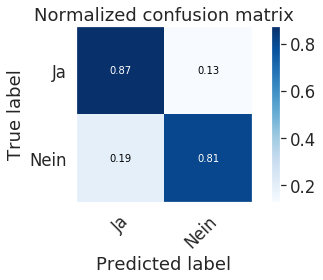

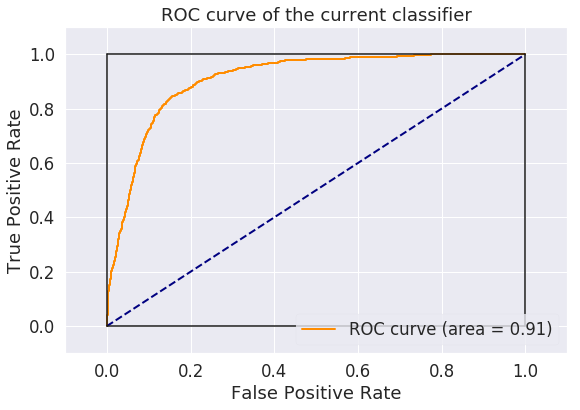

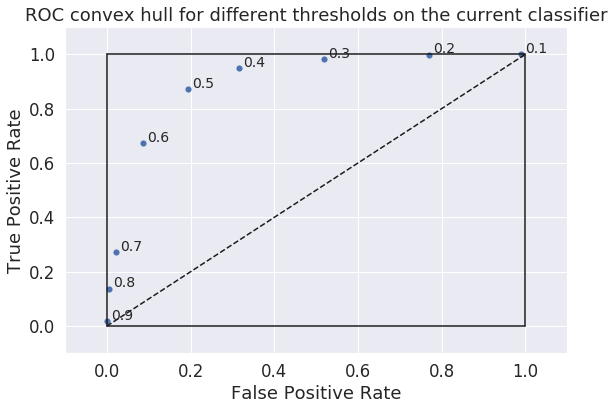

In [126]:
# preparing the best experienced model
model = RandomForestClassifier(n_estimators=80, max_depth=6,random_state=0, 
                                class_weight='balanced', min_samples_split=4, min_samples_leaf=12)

# data preparation
[dataCols, X_train, X_test, y_train, y_test] = orgData(Data)

# training the model
model.fit(X_train,y_train)

# recheck the model performance on the training data
y_pred = model.predict(X_test)
plot_confusion_matrix(y_test, y_pred, classes=np.array(['Ja', 'Nein']), normalize=True)
plt.grid(None)
print('\n', classification_report(y_test, y_pred, target_names=np.array(['Ja', 'Nein']), labels = [1, 0]))

print("Dimensions of training data: {}" .format(X_train.shape))

recall = recall_score(y_test, y_pred)
print("Recall: %.2f%%" % (recall * 100.0))

plotROC(model, X_train, y_train, X_test, y_test)

checkThresh(model, X_test, y_test, typ = 1, prt=0)

In [127]:
# Taking the probabilities of the test data
finalProbs = model.predict_proba(tData)

# taking the probabilities of the second label (positive answer of the customers to the campaign)
res = finalProbs[:,1]

# Stammnummer of the test samples
IDs_ = IDs.values

# creating a dataframe, saving the information inside it and save it into a csv file
tOutput = pd.DataFrame(columns=['ID', 'Expected'])
tOutput['ID'] = IDs_
tOutput['Expected'] = res
tOutput.to_csv('tOutput.csv', index=False)